<a href="https://colab.research.google.com/github/Motunrayo244/EDISS-MP/blob/main/MachineLearning/MachineLearningproject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Bank Client response to Direct Marketing Mobile Campaign using Machine Learning
Author: Motunrayo Ibiyo

Machine learning Project 1

In a certain bank, details of the customers and socioeconomic factors were collected to predict if the client will subscribe to a bank term deposit or not. The data provided were an anonymised format of data collected during a marketing campaign of the bank using phone calls.
This project aims to predicts the result of marketing campaigns of the bank term to clients given the available information about the client before the call is placed.

A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.
https://www.investopedia.com/terms/t/termdeposit.asp

To solve this problem, the machine learning approach will be used. The machine learning approach provides a way to learn from the large dataset of clients available. This technique is simpler and more effective than using rule-based technique to guide the decision. To ensure that the best models are selected, an array of machine learning with different characteristics will be evaluated on a sample of the dataset using K-Fold cross validation method. We will then select the best two and compare their performance based on accuracy, f1, precision and training and prediction duration.

### Data
The dataset consists of 41,188 datapoints and 21 attributes with one the attributes indicating the target.

•	20 features

•	1 target (Categorical)

The 20 features in the dataset can be divided into three subgroups: client specific details, campaign related details and social economic factors. The client specific detail is made up of the client’s the age, education, profession, marital status. It also includes information about the customer's credit facilities with the bank. The campaign details consist of the number of times the client was contacted, outcome of previous campaigns



In [ ]:
%%capture
! pip install imbalanced-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import datetime, calendar

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,RobustScaler,StandardScaler
from sklearn.tree import plot_tree as skplot_tree
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from sklearn.tree import DecisionTreeClassifier, _tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,classification_report,confusion_matrix
from xgboost import XGBClassifier, plot_importance, plot_tree,DMatrix
from sklearn.metrics import roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from imblearn.over_sampling import ADASYN

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Motunrayo244/EDISS-MP/main/MachineLearning/bank-additional-full.csv", sep=";")

In [ ]:
data_copy = data.copy() # copy the data incase of changes in the future

In [ ]:
data.shape

(41188, 21)

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Data Investigation and Preprocessing

In [ ]:
print(f"unique jobs are {data['job'].unique().tolist()}")
print(f"unique marital_status are {data['marital'].unique().tolist()}")
print(f"unique educaion are {data['education'].unique().tolist()}")
print(f"unique value of defaulted values are {data['default'].unique().tolist()}")
print(f"unique value for has house loan are {data['housing'].unique().tolist()}")
print(f"unique values for has personal loans are {data['loan'].unique().tolist()}")
print(f"unique values for type of communication means are{data['contact'].unique().tolist()}")
print(f"unique values for months are {data['month'].unique().tolist()}")
print(f"unique values for weekday are {data['day_of_week'].unique().tolist()}")
print(f"unique values for previous marketing campaign are {data['poutcome'].unique().tolist()}")
print(f"unique values for target y are {data['y'].unique().tolist()}")


unique jobs are ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
unique marital_status are ['married', 'single', 'divorced', 'unknown']
unique educaion are ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
unique value of defaulted values are ['no', 'unknown', 'yes']
unique value for has house loan are ['no', 'yes', 'unknown']
unique values for has personal loans are ['no', 'yes', 'unknown']
unique values for type of communication means are['telephone', 'cellular']
unique values for months are ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep']
unique values for weekday are ['mon', 'tue', 'wed', 'thu', 'fri']
unique values for previous marketing campaign are ['nonexistent', 'failure', 'success']
unique values for target y are ['no', 'yes']


## Social Economical Features

The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services. Financial market prices are driven by countless factors. One such factor is the CPI, as reactionary Fed policies directly impact economic growth, corporate profits, and consumer spending ability. A higher CPI often means that a less stringent government policy is generally in place. This means that debt is often easier to obtain for cheaper and that individuals have greater spending capacity. On the other hand, lower or decreasing CPI may indicate that the government may ease policy that helps boost the economy.
https://www.investopedia.com/terms/c/consumerpriceindex.asp

The statistics on Consumer Confidence express consumers’ sentiments, expectations and intentions relating to economic matters. The Consumer Confidence Indicator (CCI) expresses consumers’ views and expectations concerning economic development. The Consumer Confidence Indicator is the average of the balance figures for the CCI components. The components are: own economy now, own economy in one year’s time, Finland's economy in one year's time and consumer’s spending money on major purchases within one year. The confidence indicator can range between -100 and +100. The higher the figure, the brighter is the view on the economy.
https://www.stat.fi/meta/kas/kuluttajien_luo_en.html

Euribor is short for Euro Interbank Offered Rate. The Euribor rates are based on the average interest rates at which a large panel of European banks borrow funds from one another. - percentage

Number of employees refers to the total number of full-time employees an enterprise employs during a calendar month. Two half-time employees, for example, represent one full-time employee.

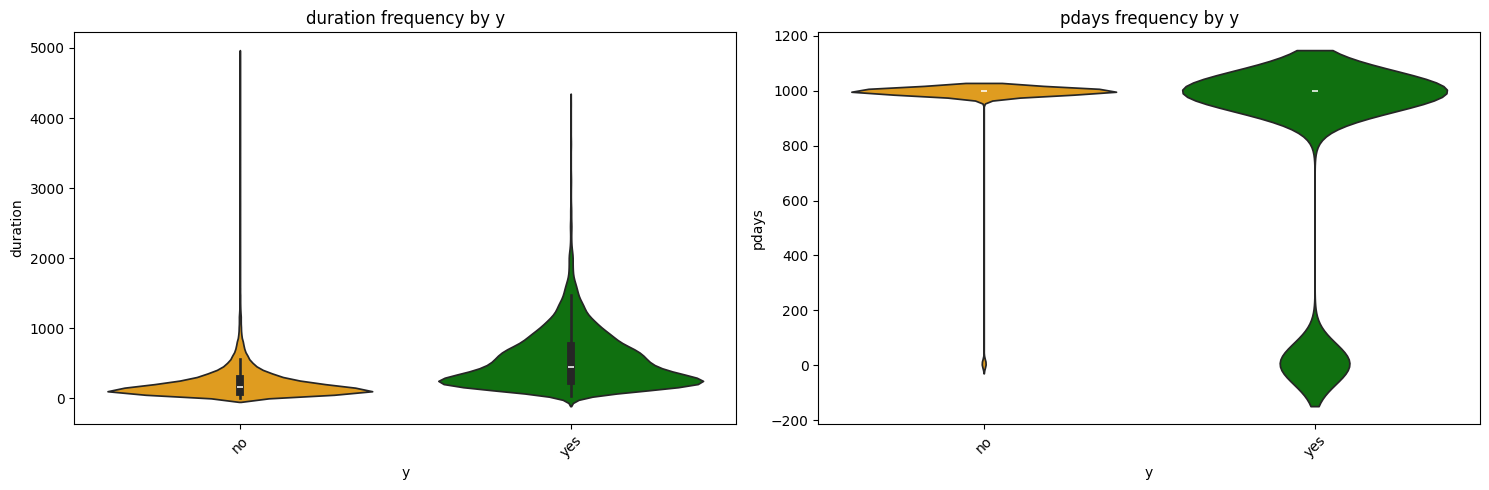

In [ ]:
columns_to_plot = ['duration', 'pdays']
# Number of rows and columns for the subplot grid
n_rows = 1
n_cols = 2

custom_colors = {'no': 'orange', 'yes': 'green'}
# Create a figure with subplots
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(data=data, y=column, x='y', hue= 'y', palette=custom_colors)
    plt.title(f'{column} frequency by y')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Display the figure
plt.show()

In [ ]:
numeric_features = data.select_dtypes(include=np.number).columns.tolist()
object_features = data.select_dtypes(include='object').columns.tolist()

In [ ]:
data[object_features] = data[object_features].astype('category')

In [ ]:
data[object_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          41188 non-null  category
 1   marital      41188 non-null  category
 2   education    41188 non-null  category
 3   default      41188 non-null  category
 4   housing      41188 non-null  category
 5   loan         41188 non-null  category
 6   contact      41188 non-null  category
 7   month        41188 non-null  category
 8   day_of_week  41188 non-null  category
 9   poutcome     41188 non-null  category
 10  y            41188 non-null  category
dtypes: category(11)
memory usage: 444.9 KB


<Axes: ylabel='y'>

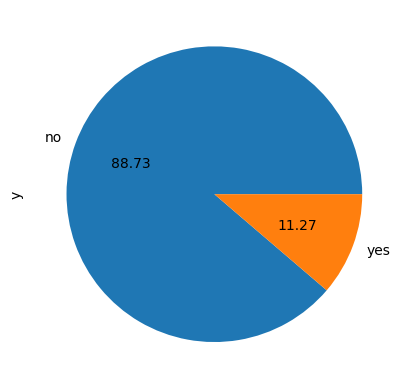

In [ ]:
data['y'].value_counts().plot.pie(autopct='%.2f')

### Categorical Features

The categorical features in the dataset were viewed in a count plot to see the distributions of the values against the target value.

- The dataset is imbalanced, and this imbalance is evenly distributed across all the categorical values within the features except for poutcome, where the number of failure and success are much lower than non-existent

- it was observed that the day of the week and month had no little correlation with the target values. All days had an even ratio no and yes responses. Therefore, day of the week and month were dropped from the dataset


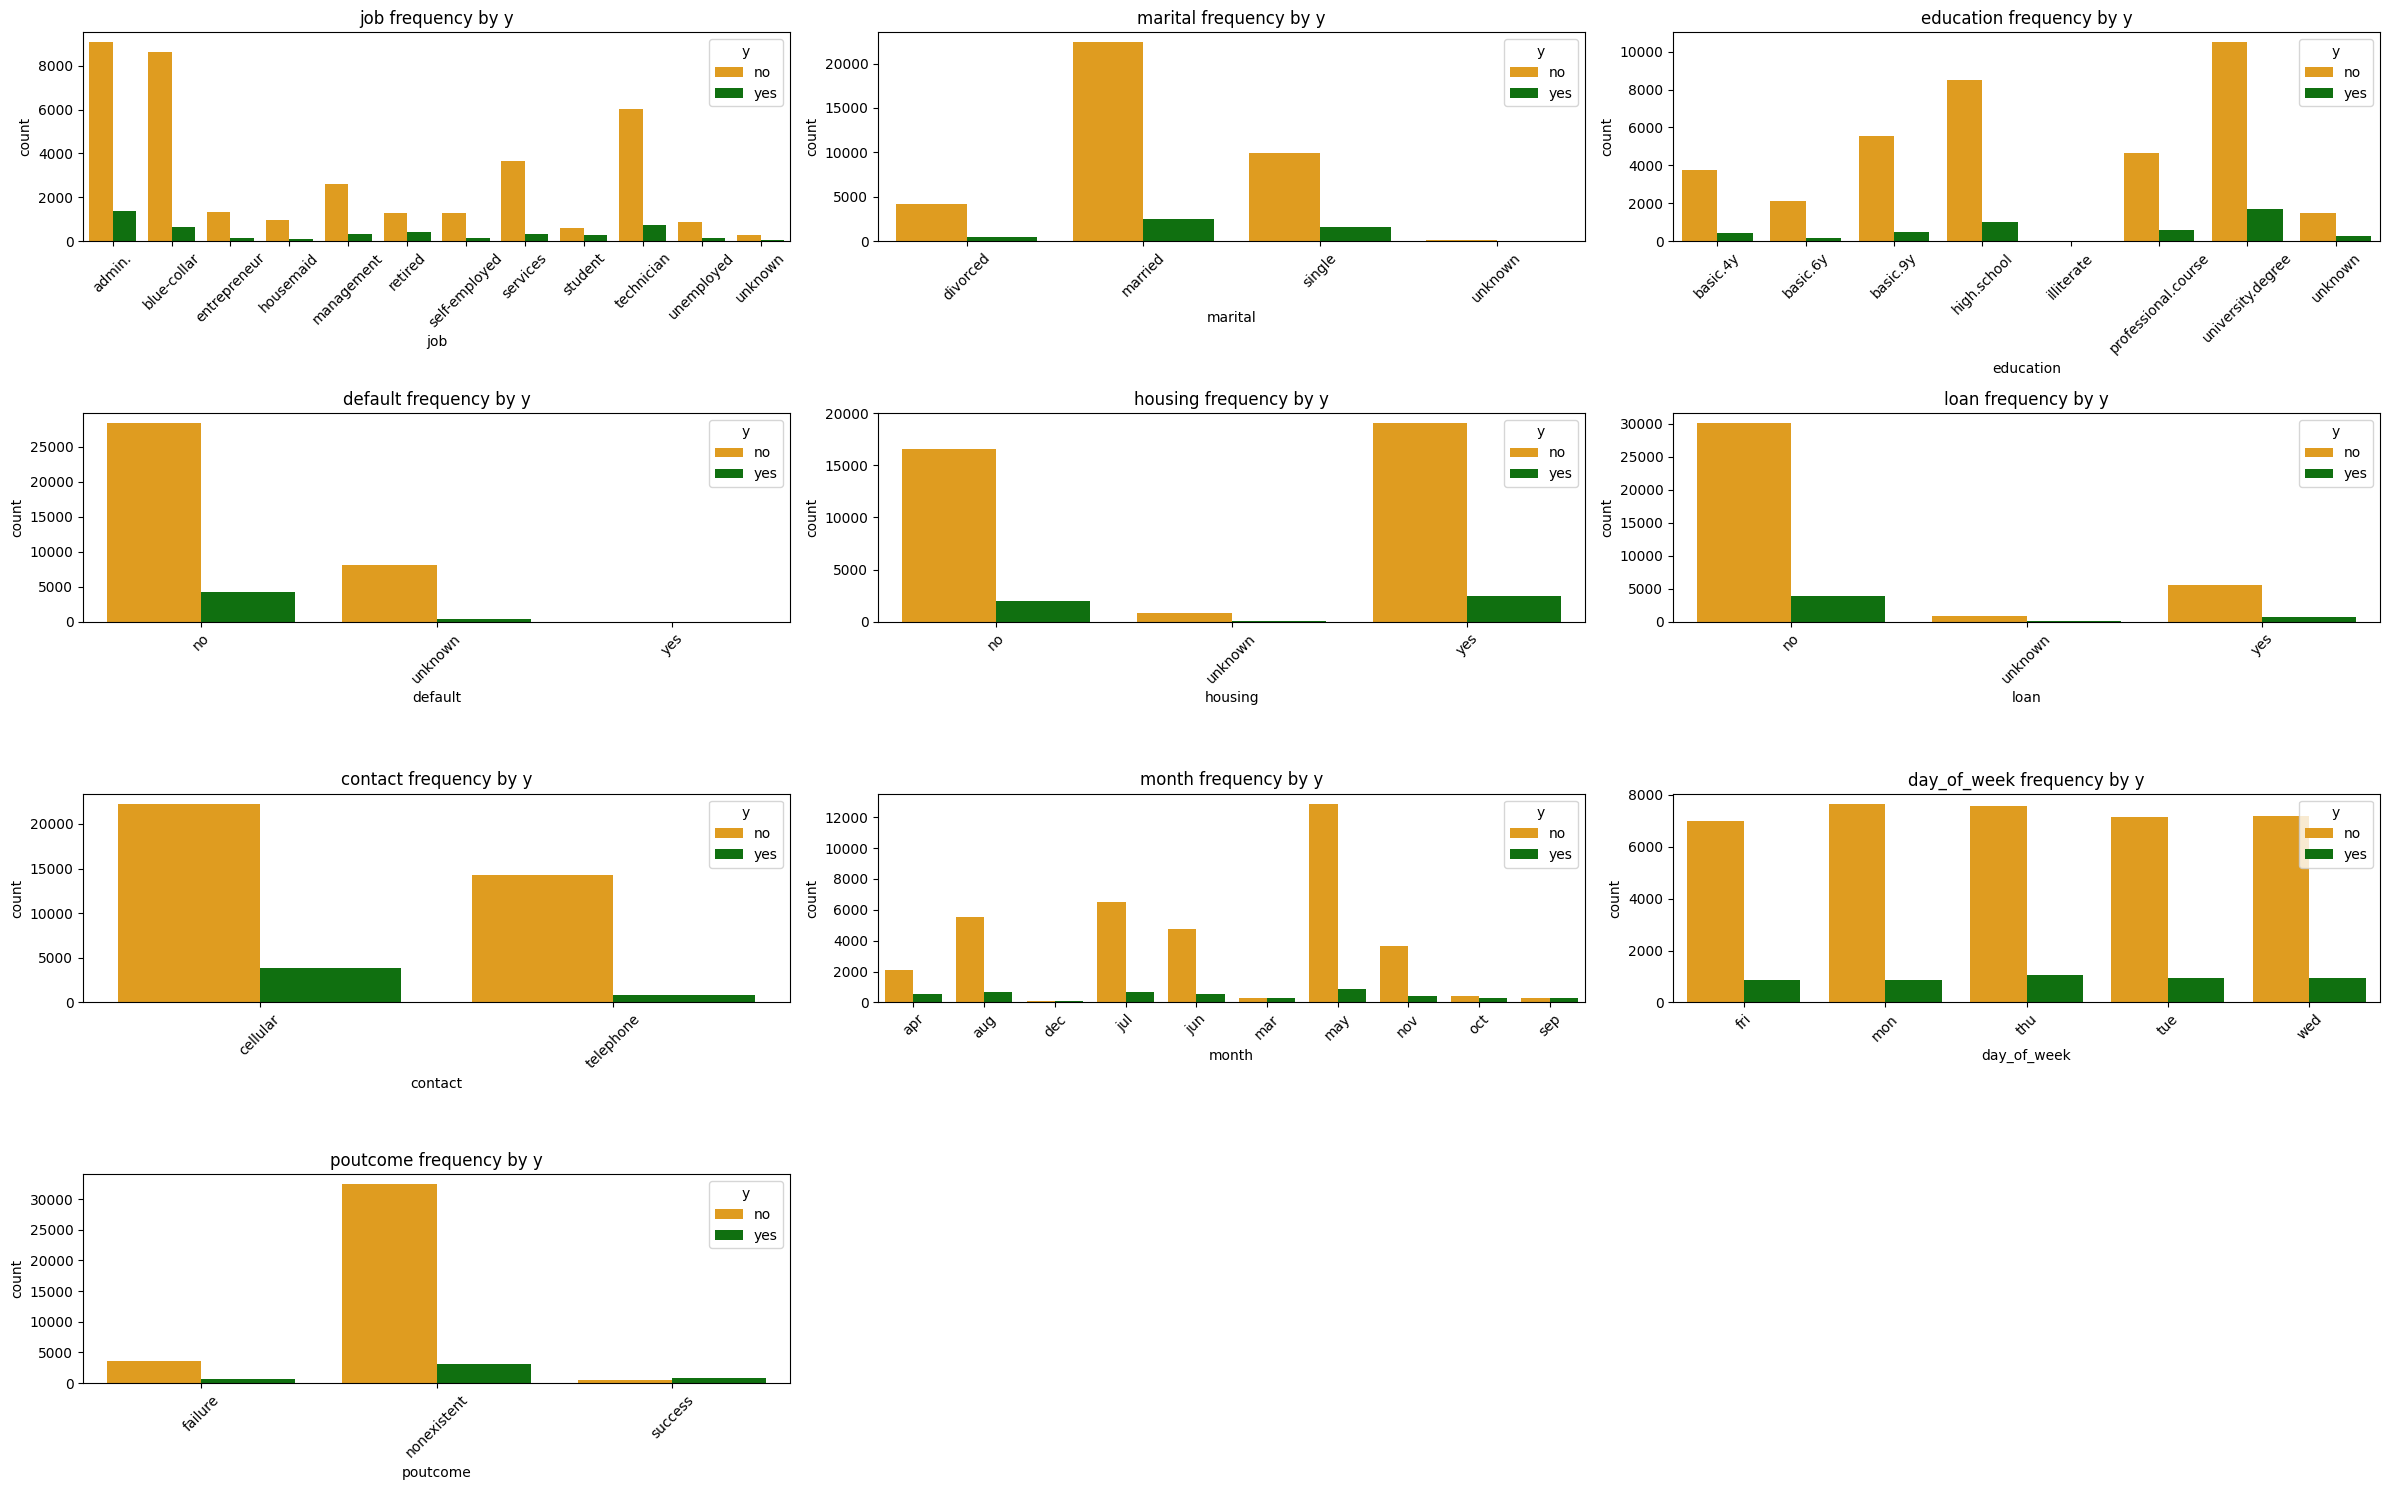

In [ ]:
categorical_features = data.select_dtypes(include='category').columns.tolist()
categorical_features.remove('y')
# Number of rows and columns for the subplot grid
n_rows = 4
n_cols = 3

custom_colors = {'no': 'orange', 'yes': 'green'}
# Create a figure with subplots
plt.figure(figsize=(24, 15))
for i, column in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=data, x=column, hue='y', palette=custom_colors)
    plt.title(f'{column} frequency by y')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Display the figure
plt.show()
categorical_features = data.select_dtypes(include='category').columns.tolist()

### Numeric Features

The numerical features were analyzed with violin plot and heatmap. The violin plot shows the histogram of the features across all numerical value for each target class.

- In the analysis of numerical features, it was observed that the campaign feature has some outliers for the no target value.
- From pdays, it was also observed that a lot of customers that did not subscribe for this campaign had not been contacted in previous campaigns.

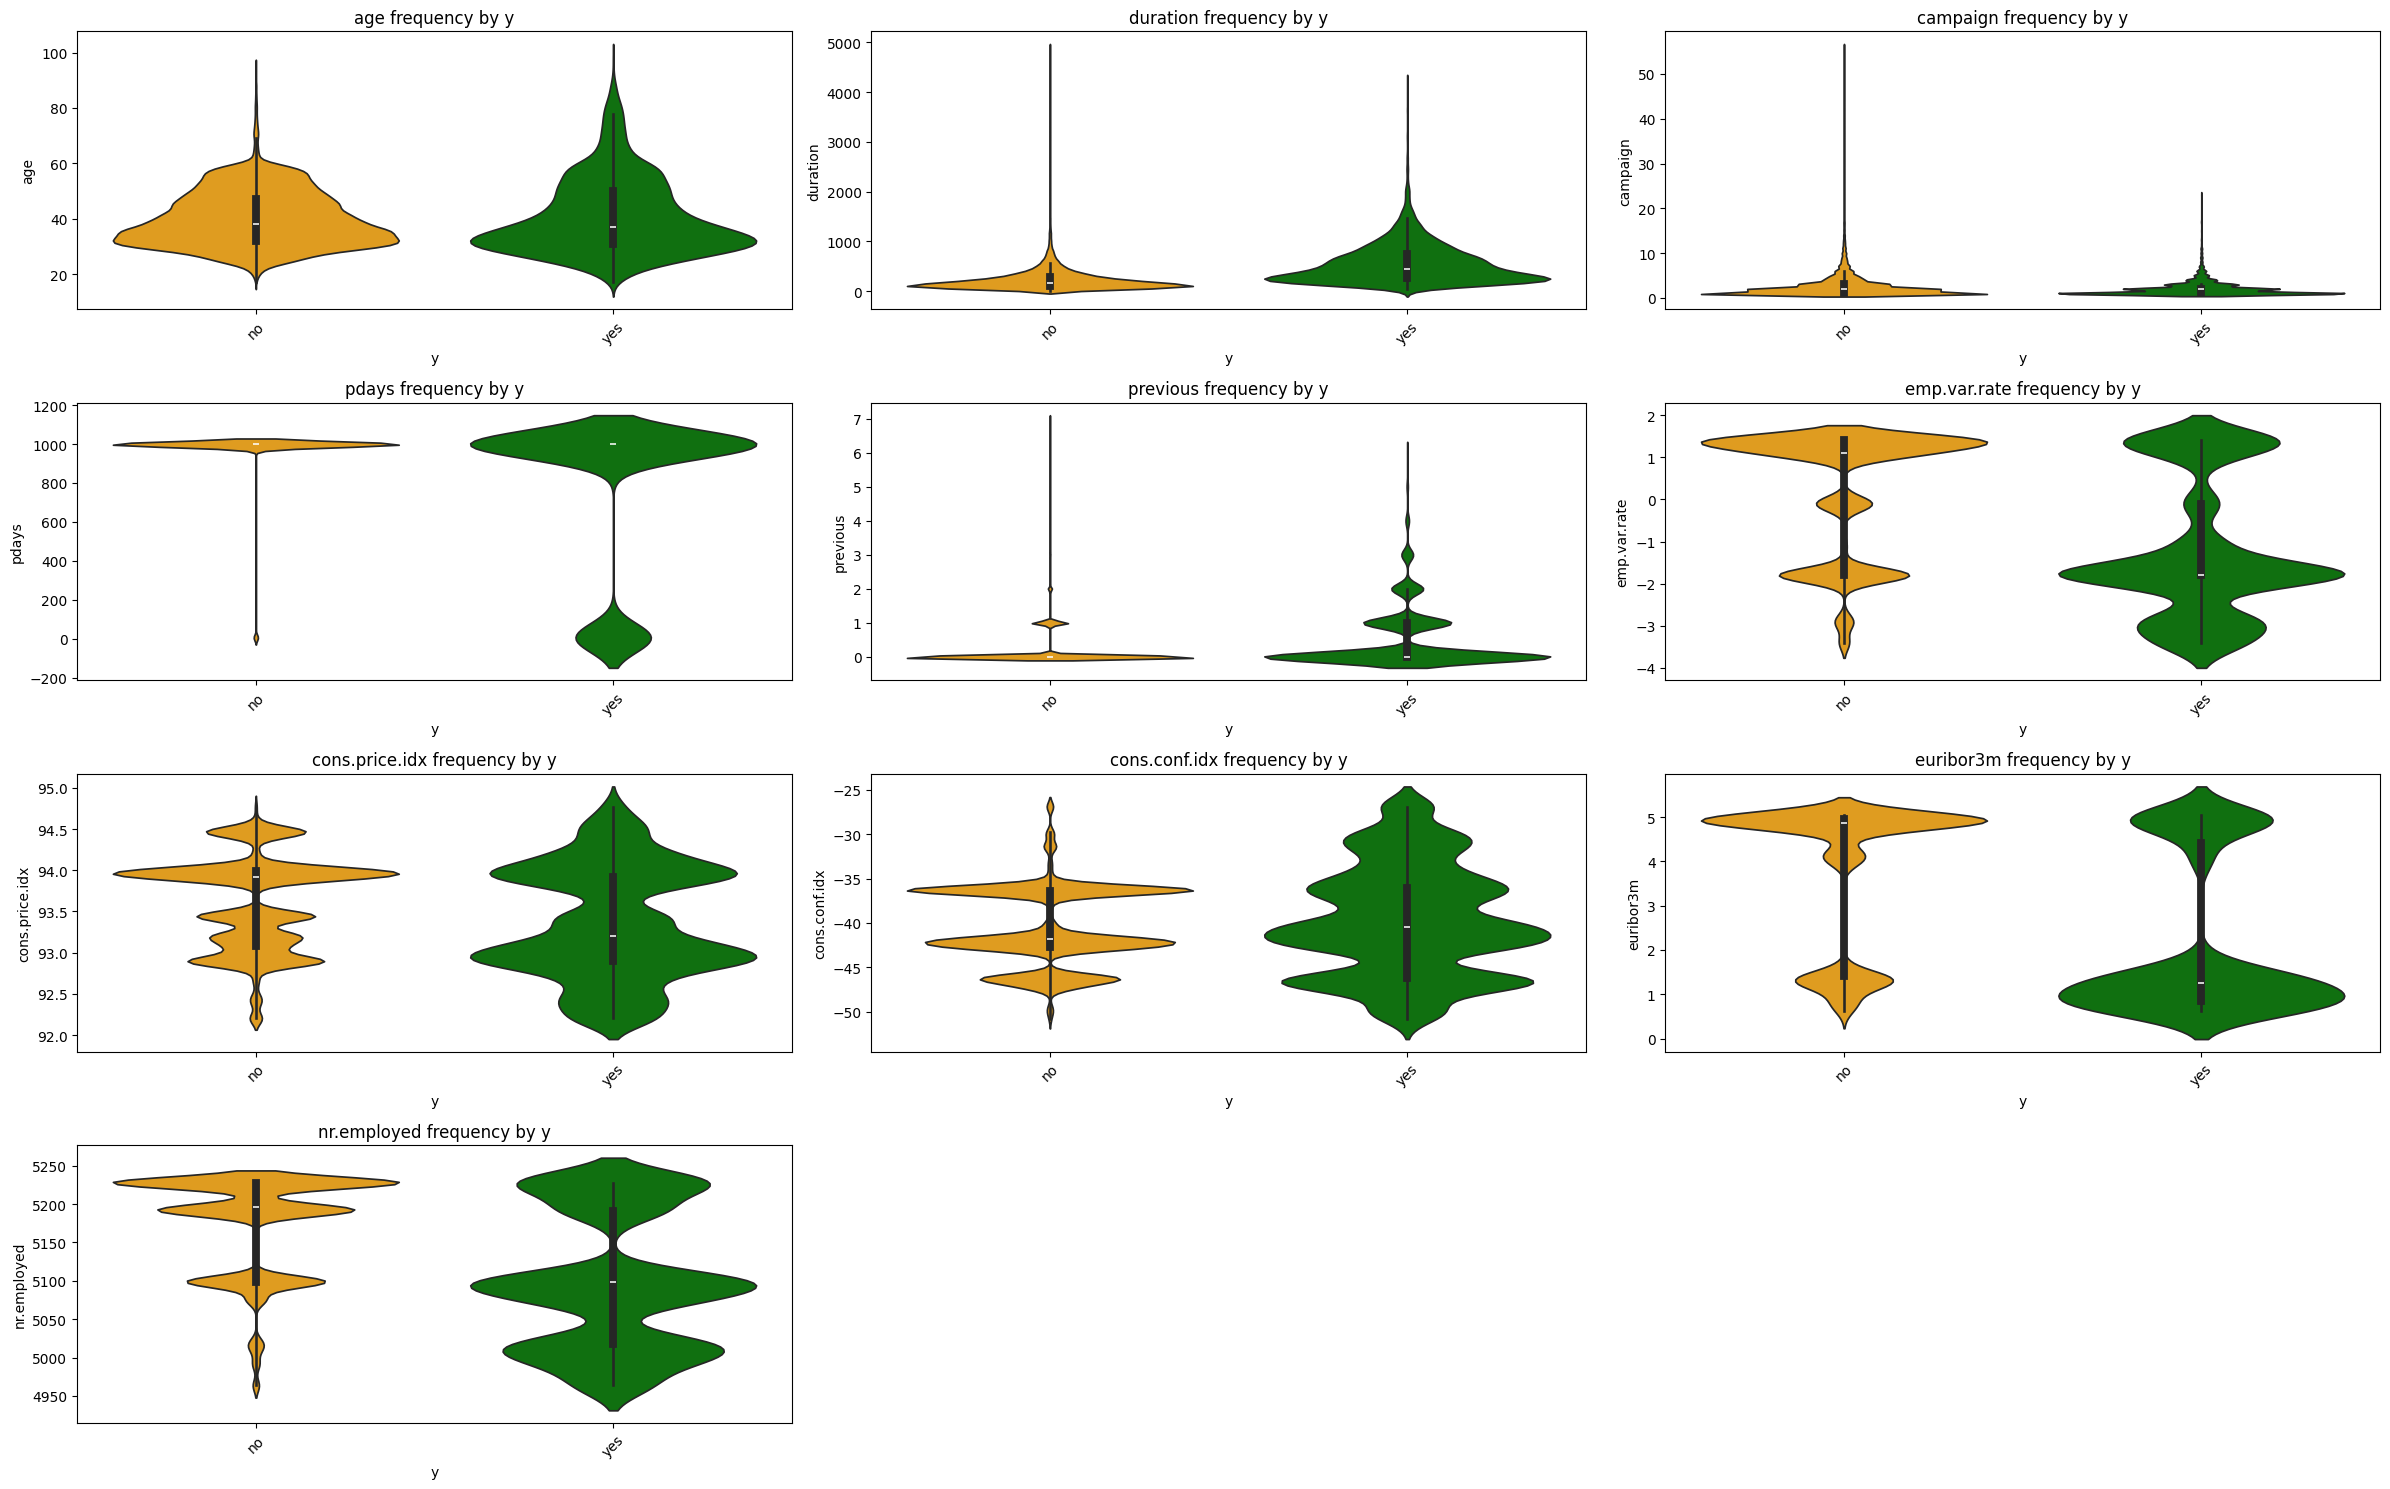

In [ ]:
# Number of rows and columns for the subplot grid
n_rows = 4
n_cols = 3

custom_colors = {'no': 'orange', 'yes': 'green'}
# Create a figure with subplots
plt.figure(figsize=(24, 15))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(data=data, y=column, x='y', hue='y', palette=custom_colors)
    plt.title(f'{column} frequency by y')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Display the figure
plt.show()

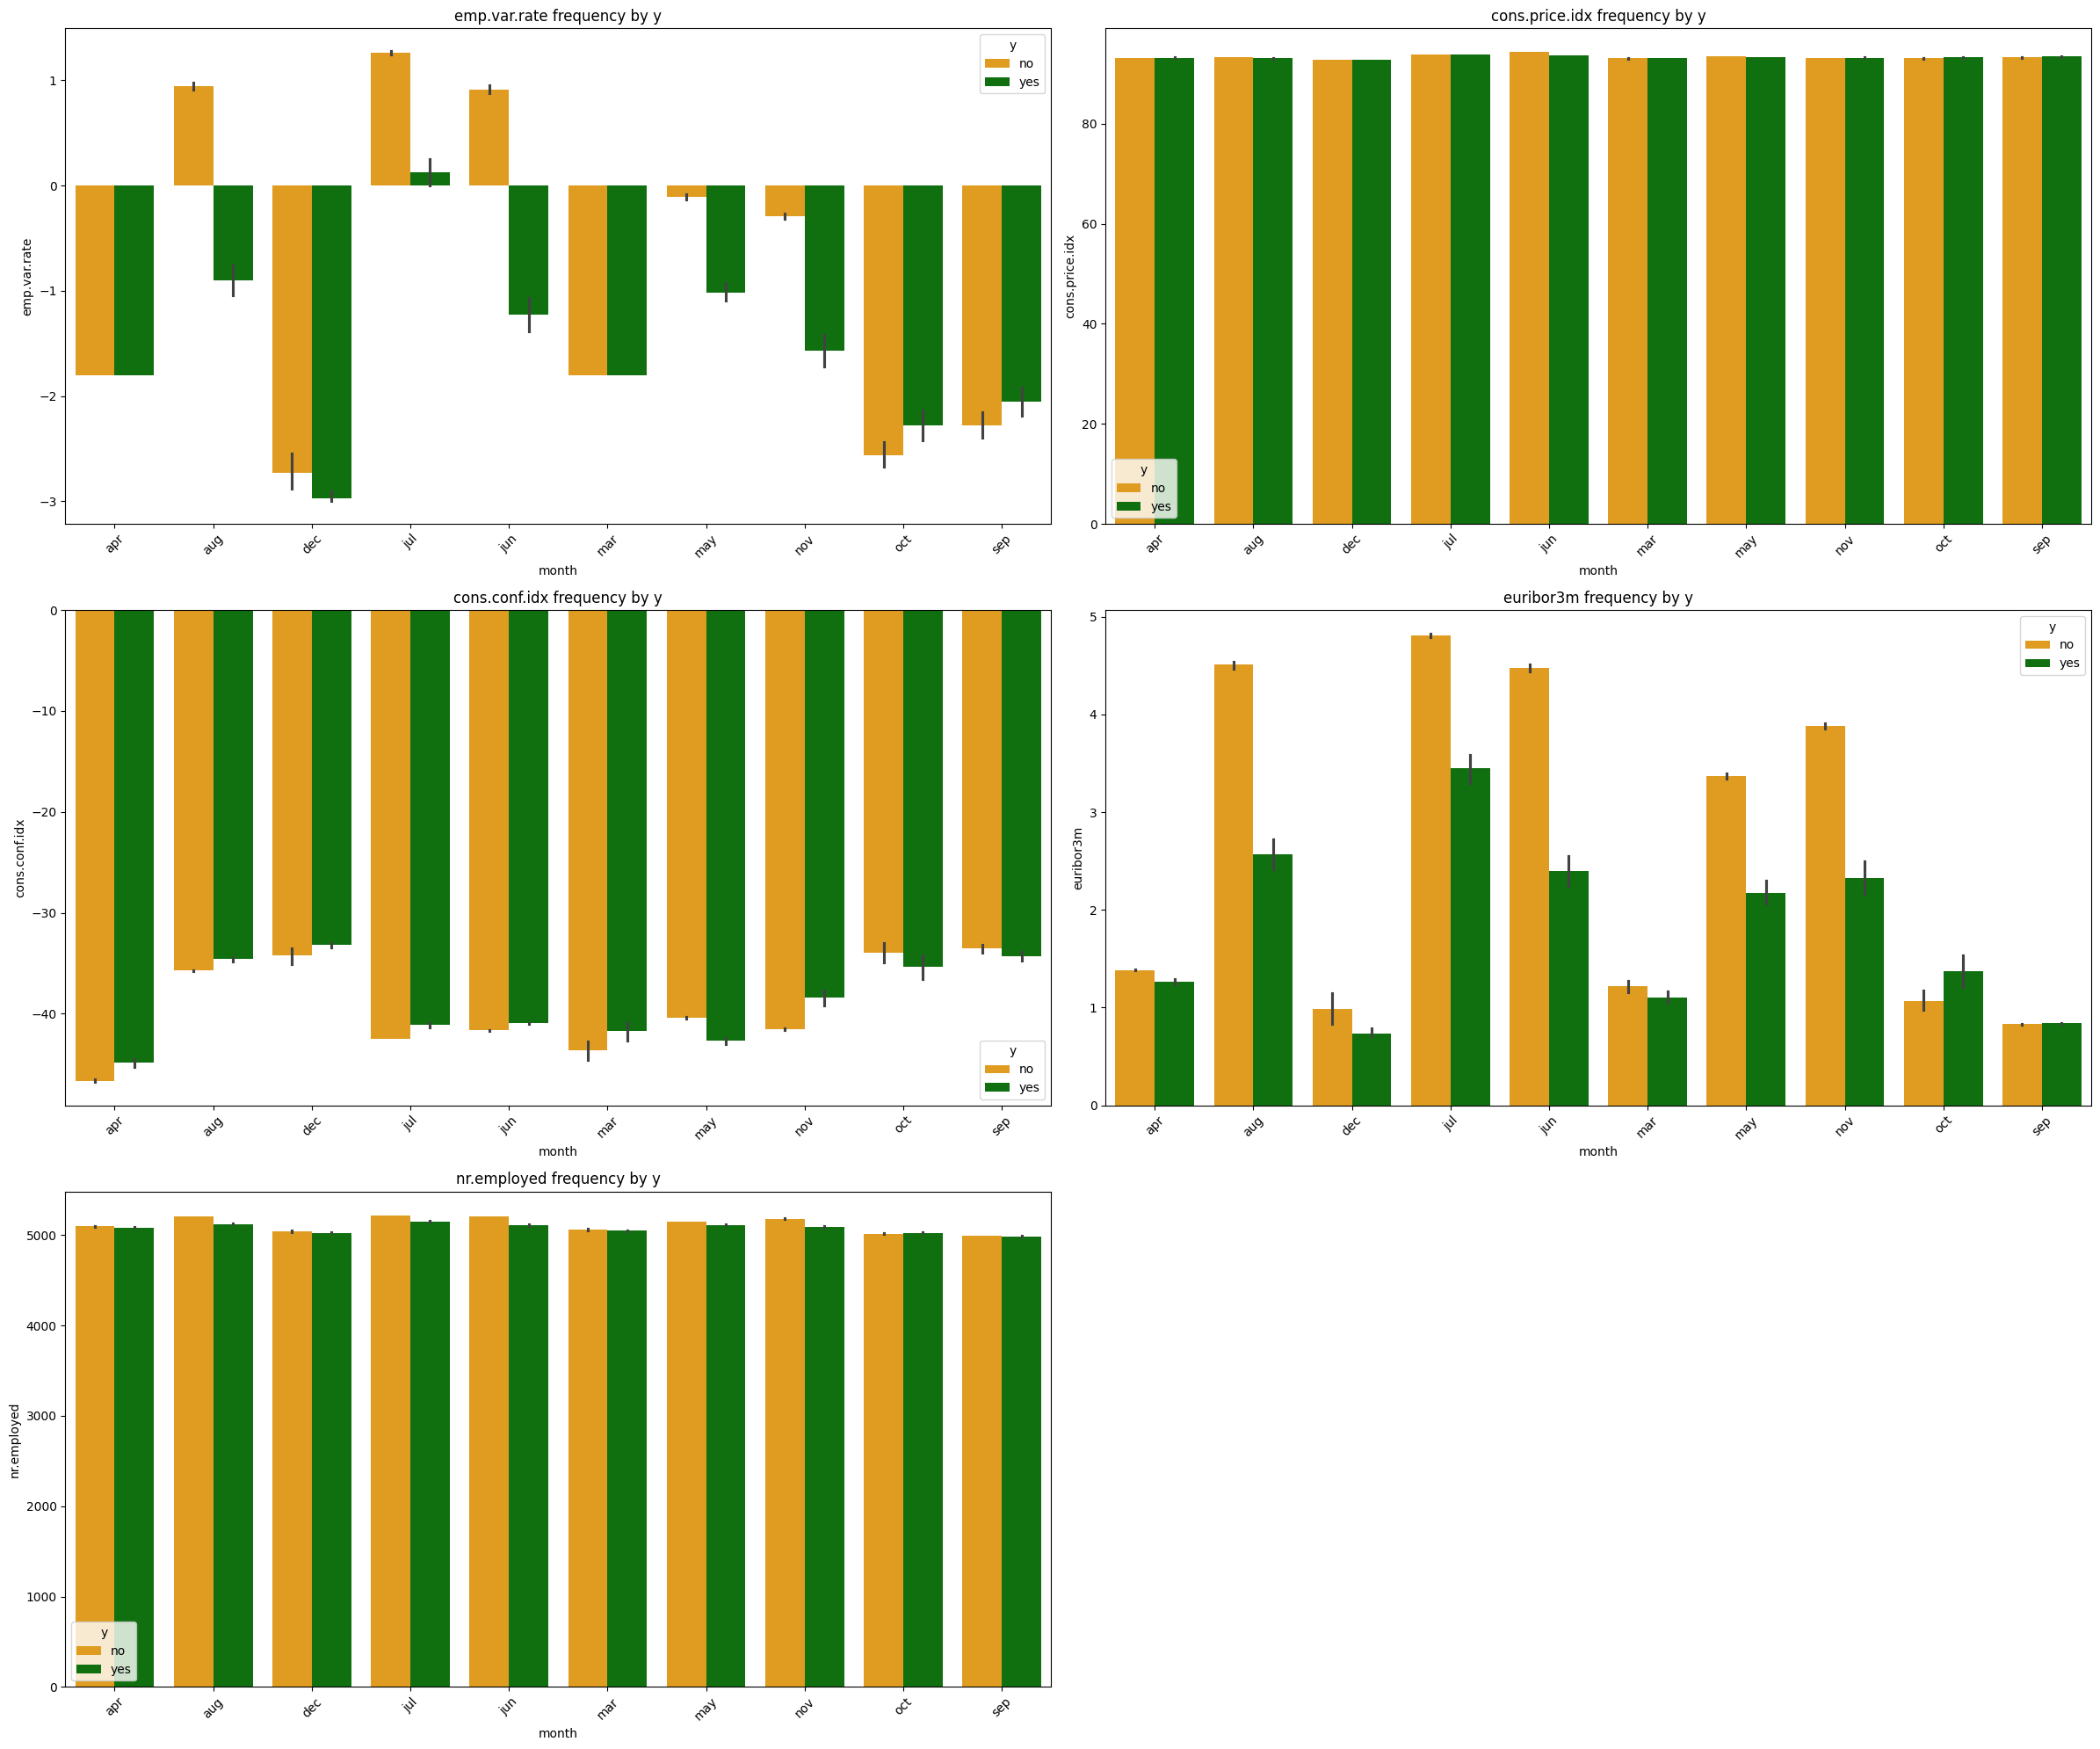

In [ ]:
# shows the mean of social and economic context attributes over months based on target values
columns_to_plot =['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
n_rows = 3
n_cols = 2

custom_colors = {'no': 'orange', 'yes': 'green'}
# Create a figure with subplots
plt.figure(figsize=(24, 20))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.barplot(data=data, x='month', y= column,hue='y', palette=custom_colors)
    plt.title(f'{column} frequency by y')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Display the figure
plt.show()


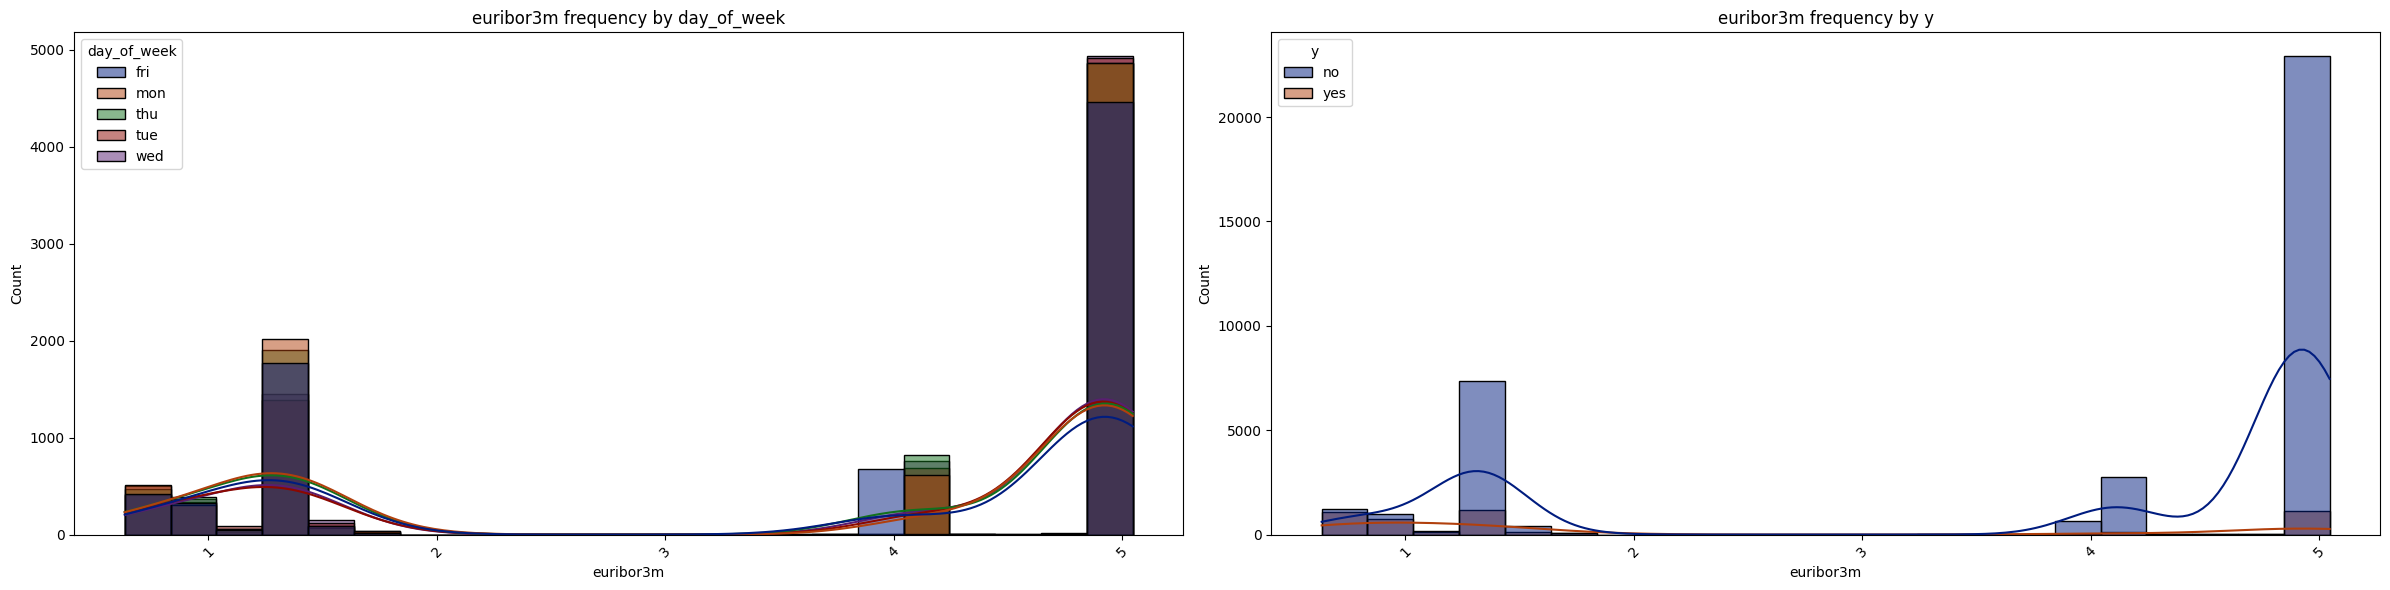

In [ ]:
columns_to_plot =['day_of_week','y']
n_rows = 1
n_cols = 2

# custom_colors = {'no': 'orange', 'yes': 'green'}
# Create a figure with subplots
plt.figure(figsize=(24, 6))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=data, hue=column, x= 'euribor3m', kde=True, palette='dark')
    plt.title(f'euribor3m frequency by {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Display the figure
plt.show()

Text(0.5, 1.0, 'Heatmap of DataFrame')

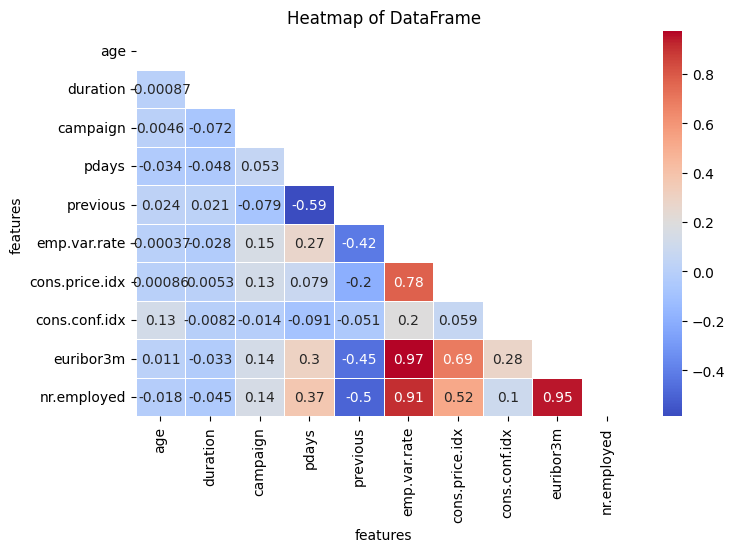

In [ ]:
plt.figure(figsize=(8,5))
mask = np.triu(np.ones_like(data[numeric_features].corr().corr(), dtype=bool))
sns.heatmap(data[numeric_features].corr(),
            annot=True, cmap='coolwarm', linewidths=0.5,  mask=mask)
plt.xlabel("features")
plt.ylabel("features")
plt.title("Heatmap of DataFrame")

## Feature Engineering

This section is made up of Data preprocessing or Wranggling, Data augumentation and Feature selection

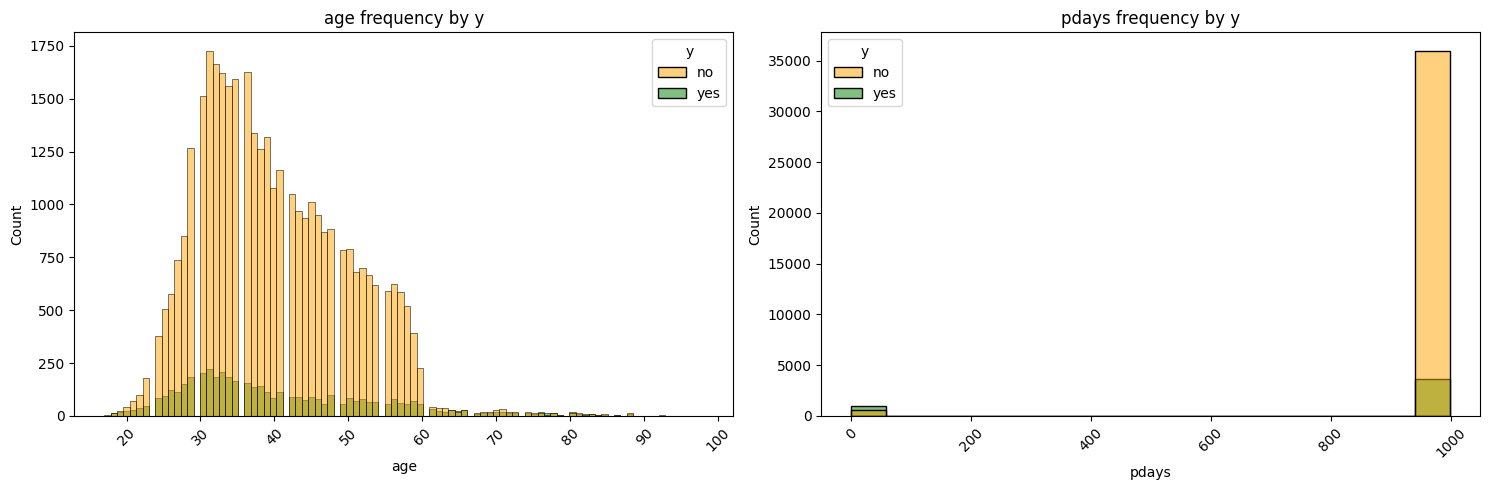

In [ ]:
columns_to_plot = ['age', 'pdays']
# Number of rows and columns for the subplot grid
n_rows = 1
n_cols = 2

custom_colors = {'no': 'orange', 'yes': 'green'}
# Create a figure with subplots
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=data, x=column, hue= 'y', palette=custom_colors)
    plt.title(f'{column} frequency by y')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Display the figure
plt.show()

##Data Preprocessing
The following preprocessing was carried out

Age was converted to ordinal numbers from 1 to 6 with 1 representing clients below 20 years and 6 representing clients above 60 years.

|    Age   | Group |
|-------|-------|
| <20 |   1   |       
| 20-29|   2  |       
| 30-39|   3  |       
| 40-49|   4  |       
| 50-59|   5  |       
| >=60|   6   |       


|Pdays|	Group|
|-------|-------|
|999|	0|
|0 - 7|1|
|8 - 30|	2|
|>30|	3|

- The job feature was recategorized to unemployed, student, working, retired and unknown.

- The default, housing, loan and “poutcome” features were split into two new features each. The first group of features generated from them indicated if the attribute were known or unknown.

In [ ]:
def categorize_pdays(days):
    if days == 999:
        return 0
    elif (days >=0 and days <= 7):
        return 1
    elif (days>7 and days <= 30):
        return 2
    else:
        return 3

In [ ]:
def group_age(age:int)->int:
  if age <20:
    return 1
  elif (age >=20 and age <30):
    return 2
  elif (age >=30 and age <40):
    return 3
  elif (age >=40 and age <50):
    return 4
  elif (age >=50 and age <60):
    return 5
  else: return 6

In [ ]:
# group age and convert it to categorical data type
data['age']  = data['age'].apply(group_age)

# group pdays and convert it to categorical
data['pdays'] = data['pdays'].apply(categorize_pdays)
data[['age','pdays']]  = data[['age','pdays']].astype('category')

In [ ]:
category_mapping = {'housemaid': 'Working', 'services': 'Working', 'admin.': 'Working', 'blue-collar': 'Working',
    'technician': 'Working', 'management': 'Working', 'retired': 'Retired', 'unemployed': 'Unemployed','self-employed': 'Working',
                    'unknown': 'Unknown', 'entrepreneur': 'Working', 'student': 'Student'}

# Apply the mapping to create a new column 'job_category'
data['job'] = data['job'].map(category_mapping)
data['job'] = data['job'].astype('category')

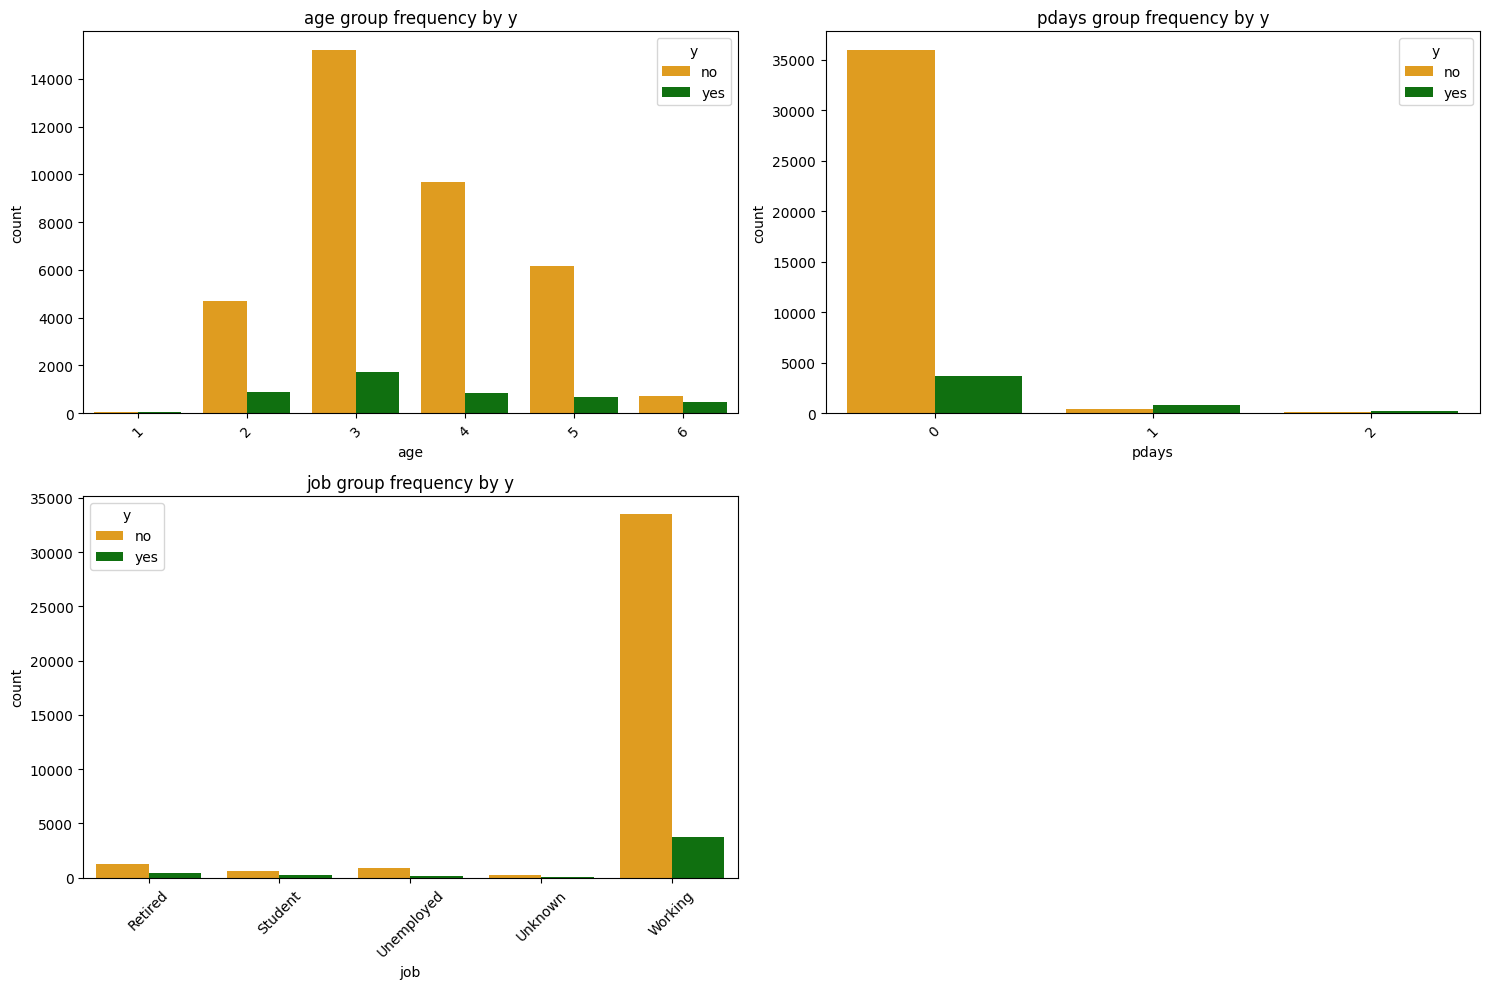

In [ ]:
columns_to_plot = ['age', 'pdays','job']
# Number of rows and columns for the subplot grid
n_rows = 2
n_cols = 2

custom_colors = {'no': 'orange', 'yes': 'green'}
# Create a figure with subplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=data, x=column, hue= 'y', palette=custom_colors)
    plt.title(f'{column} group frequency by y')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Display the figure
plt.show()

In [ ]:
data['job'].unique()

['Working', 'Retired', 'Unemployed', 'Unknown', 'Student']
Categories (5, object): ['Retired', 'Student', 'Unemployed', 'Unknown', 'Working']

In [ ]:
data.shape

(41188, 21)

In [ ]:
# convert target to bool 0: no, 1:yes
data['y'] = data['y'].apply(lambda x: 1 if x=='yes' else 0)
# convert month to numerical
month_dict = {month.lower(): index for index, month in enumerate(calendar.month_abbr) if month}
data['month'] = data['month'].apply(lambda x: month_dict[x])
#convert day of week to numerical equivalent 0:Monday and 6:sunday
day_dict = {day.lower(): index for index, day in enumerate(calendar.day_abbr) if day}
data['day_of_week'] = data['day_of_week'].apply(lambda x: day_dict[x])
#Converts education into ordinal category
education_dict = {'unknown':-1,'illiterate':0,'basic.4y':1, 'basic.6y':1, 'basic.9y':1,'high.school':2, 'professional.course':3, 'university.degree':4 }
data['education'] = data['education'].apply(lambda x: education_dict[x])

#change type to category
data[['month', 'day_of_week','education','y']] = data[['month', 'day_of_week','education','y']].astype('category')


In [ ]:
#creat a new column for value unknown or non_existence then make default a binary
data['credit_in_default_unknown'] = data['default'].apply(lambda x: 1 if x =='unknown' else 0)
data['credit_in_default'] =  data['default'].apply(lambda x: 1 if x =='yes' else 0)

data['house_loan_unknown'] = data['housing'].apply(lambda x: 1 if x =='unknown' else 0)
data['has_house_loan'] =  data['housing'].apply(lambda x: 1 if x =='yes' else 0)

data['personal_loan_unknown'] = data['loan'].apply(lambda x: 1 if x =='unknown' else 0)
data['has_personal_loan'] =  data['loan'].apply(lambda x: 1 if x =='yes' else 0)

data['p_mark_camp_nonexistent'] = data['poutcome'].apply(lambda x: 1 if x =='nonexistent' else 0)
data['p_mark_camp_outcome'] =  data['poutcome'].apply(lambda x: 1 if x =='success' else 0)

new_columns = ['credit_in_default_unknown', 'credit_in_default','house_loan_unknown','has_house_loan','personal_loan_unknown','has_personal_loan','p_mark_camp_nonexistent','p_mark_camp_outcome']
data[new_columns] = data[new_columns].astype('category')
data.drop(['default','housing', 'loan', 'poutcome'], axis=1, inplace=True)

In [ ]:
columns_to_encode = ['job', 'marital','contact']
for column in columns_to_encode:
  oh_encoder = OneHotEncoder(sparse=False).fit(data[[column]])
  oh_encoded = oh_encoder.transform(data[[column]])
  features_names_prefixed = [ f"{column}_{category}" for category in oh_encoder.categories_[0]]
  data = pd.concat([data, pd.DataFrame(oh_encoded, columns=features_names_prefixed)], axis=1)
  data[features_names_prefixed] = data[features_names_prefixed].astype('category')
  data.drop([column],axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data.describe()

,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,259.279249,2.770014,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,102.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,180.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,319.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,4918.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data.shape

(41188, 33)

In [ ]:
data.columns

Index(['age', 'education', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'credit_in_default_unknown',
       'credit_in_default', 'house_loan_unknown', 'has_house_loan',
       'personal_loan_unknown', 'has_personal_loan', 'p_mark_camp_nonexistent',
       'p_mark_camp_outcome', 'job_Retired', 'job_Student', 'job_Unemployed',
       'job_Unknown', 'job_Working', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'contact_cellular',
       'contact_telephone'],
      dtype='object')

<Axes: ylabel='y'>

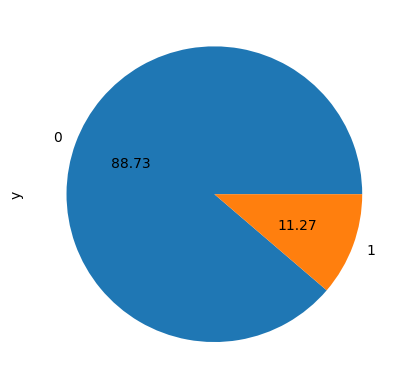

In [ ]:
data['y'].value_counts().plot.pie(autopct='%.2f')

### Feature Selection

The objective of this step is to select the best features from the features from the list available. To select the best features three technique was used.
1. The first method was the elimination of features with low corellation.
2. The second technique explored was the sklearn feature selection method selectKBest.
3. The last technique explored for feature selection was the recursive feature elmination (RFE) method from sklearn feature selection class.

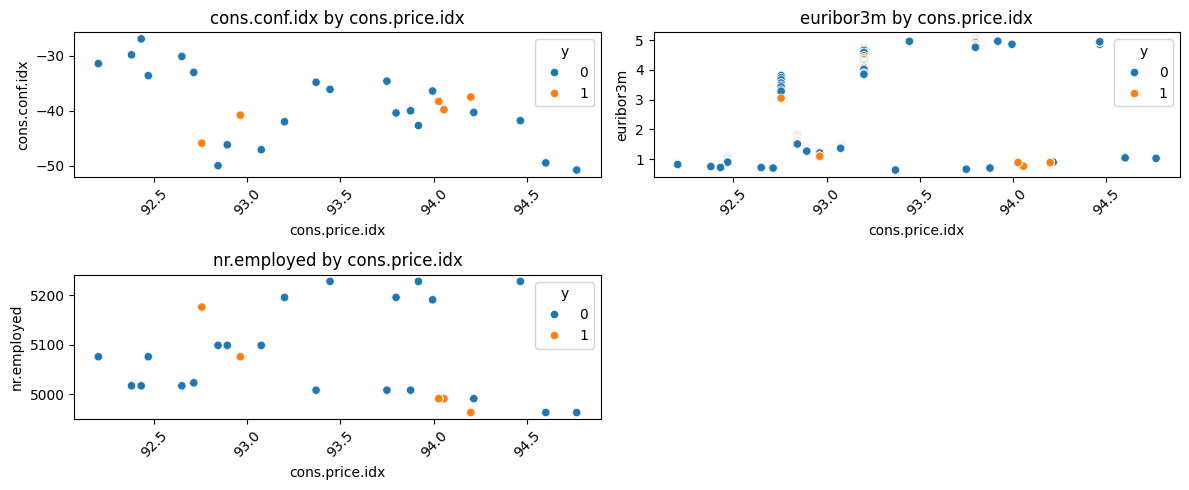

In [ ]:
# Check to see if the social-economic features give the same information
columns_to_plot =['cons.conf.idx','euribor3m','nr.employed']
n_rows = 2
n_cols = 2

# custom_colors = {'no': 'orange', 'yes': 'green'}
# Create a figure with subplots
plt.figure(figsize=(12, 5))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(data=data, y=column, x= 'cons.price.idx',hue='y')
    plt.title(f'{column} by cons.price.idx')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Display the figure
plt.show()

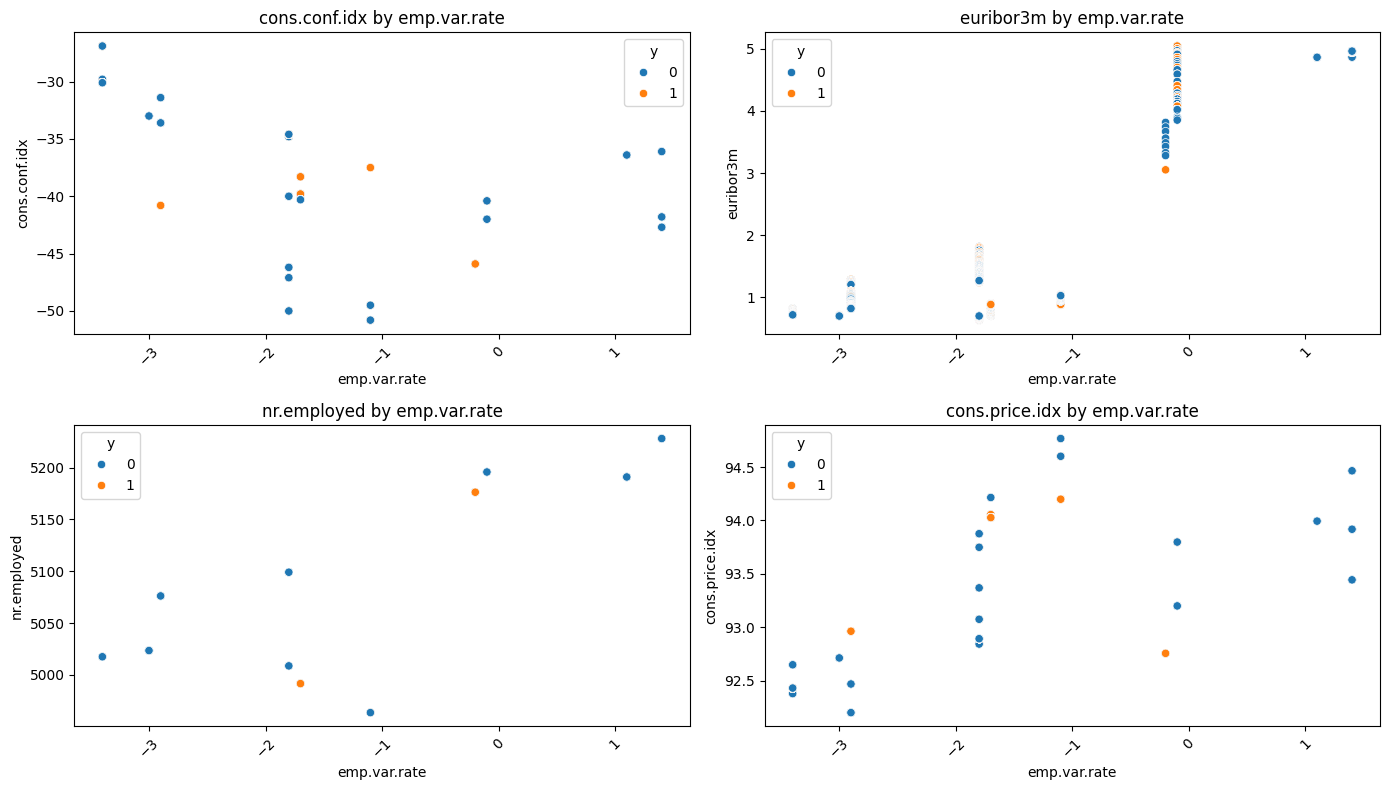

In [ ]:
# Check to see if the social-economic features give the same information
columns_to_plot =['cons.conf.idx','euribor3m','nr.employed','cons.price.idx']
n_rows = 2
n_cols = 2

# custom_colors = {'no': 'orange', 'yes': 'green'}
# Create a figure with subplots
plt.figure(figsize=(14, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(data=data, y=column, x='emp.var.rate' ,hue='y')
    plt.title(f'{column} by emp.var.rate')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Display the figure
plt.show()

In [ ]:
#preliminary feature selection remove features that donot intuitively add to the target
# contact, month of last contact, day of last contact, duration and nr.emplyed
data_copy2 = data.copy()
# data.drop(['duration'], axis=1, inplace=True)
data.drop([ 'month', 'day_of_week', 'nr.employed','duration'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   age                        41188 non-null  category
 1   education                  41188 non-null  category
 2   campaign                   41188 non-null  int64   
 3   pdays                      41188 non-null  category
 4   previous                   41188 non-null  int64   
 5   emp.var.rate               41188 non-null  float64 
 6   cons.price.idx             41188 non-null  float64 
 7   cons.conf.idx              41188 non-null  float64 
 8   euribor3m                  41188 non-null  float64 
 9   y                          41188 non-null  category
 10  credit_in_default_unknown  41188 non-null  category
 11  credit_in_default          41188 non-null  category
 12  house_loan_unknown         41188 non-null  category
 13  has_house_loan             4118

### Baseline Model

The Base line model is used to measure the performnce of the feature selection method.
 The accuracy of the baseline model before oversampling is 89.7 however, the fi score is very low. The F1 score is as a result of the model biaseness towards class 0. To overcome this an oversampling technique was used.

 The performance of the model can be seen in the cells below.

In [ ]:
X = data.drop(['y'], axis=1, inplace=False)
y= data['y']
X_train, X_test,  y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)
print(X_test.shape)

(32950, 28)
(8238, 28)


In [ ]:
model = GradientBoostingClassifier(random_state=42, max_depth=6, validation_fraction=0.2,n_iter_no_change=10)
# model = DecisionTreeClassifier(random_state=42, max_depth=6)
start = datetime.datetime.now()
model.fit(X_train, y_train)
end = datetime.datetime.now()
baseline_pred = model.predict(X_test)

pred_duration = (end - start).total_seconds()
accuracy = round(accuracy_score(y_test, baseline_pred),3)
f1 = round(f1_score(y_test, baseline_pred),3)
print(f'training duration: {pred_duration}\n accuracy: {accuracy} \n f1_score:{f1}')
print(classification_report(y_test, baseline_pred))
result_dict= {'Baseline(28)':{'train_duration':pred_duration,'acc':accuracy,'f1':f1}}

training duration: 3.438942
 accuracy: 0.897 
 f1_score:0.364
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.61      0.26      0.36       935

    accuracy                           0.90      8238
   macro avg       0.76      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238



#### Data Scaling
This is done to make the data comparable and remove features with low variance.
'cons.conf.idx' and 'cons.price.idx' were divided  by 100 as the expected range of the values are known.

In [ ]:
def scale_num_row(X):

  min_max_scaled_col = ['campaign','previous','emp.var.rate','euribor3m']
  min_max_scaler = MinMaxScaler()
  min_max_scaler.fit(X[min_max_scaled_col])
  X[min_max_scaled_col] = min_max_scaler.transform(X[min_max_scaled_col])
  X['cons.conf.idx'] = X['cons.conf.idx']/100
  X['cons.price.idx'] = X['cons.price.idx']/100
  return X

In [ ]:
X = scale_num_row(X)
X.var(axis=0)

<ipython-input-43-39b483566527>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.var(axis=0)


campaign          0.002537
previous          0.004999
emp.var.rate      0.107114
cons.price.idx    0.000034
cons.conf.idx     0.002142
euribor3m         0.154614
dtype: float64

Text(0.5, 1.0, 'Heatmap of DataFrame')

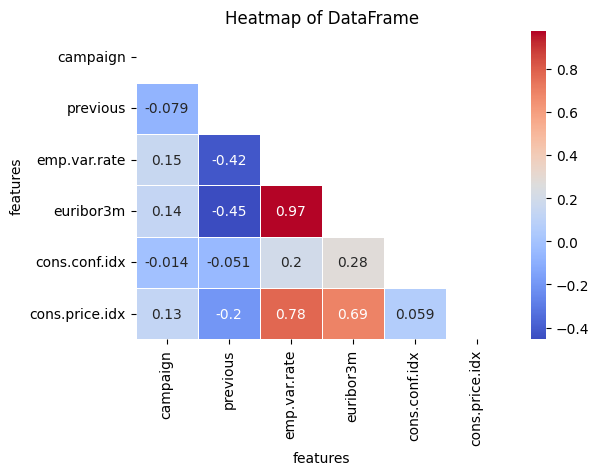

In [ ]:
col_to_plot = ['campaign','previous','emp.var.rate','euribor3m','cons.conf.idx','cons.price.idx']
mask = np.triu(np.ones_like(X[col_to_plot].corr().corr(), dtype=bool))
plt.figure(figsize=(6,4))
sns.heatmap(X[col_to_plot].corr(),
            annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.xlabel("features")
plt.ylabel("features")
plt.title("Heatmap of DataFrame")

In [ ]:
# #Filter by Variance threshold
X.drop(['cons.price.idx','cons.conf.idx'], axis=1, inplace=True)

X_train, X_test,  y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True,stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)

start = datetime.datetime.now()
model.fit(X_train, y_train)
end = datetime.datetime.now()
baseline_pred = model.predict(X_test)

pred_duration_var = (end - start).total_seconds()
accuracy_var = round(accuracy_score(y_test, baseline_pred),3)
f1_var = round(f1_score(y_test, baseline_pred),3)
print(f'training duration: {pred_duration_var}\n accuracy: {accuracy_var} \n f1_score:{f1_var}')
print(classification_report(y_test, baseline_pred))

dict_ ={'fe_Varance_tresh(26)':{'train_duration':pred_duration_var,'acc':accuracy_var,'f1':f1_var}}
result_dict.update(dict_)
# removing cons.price.idx  and scaling the numeric parameters  improve the recall abit however training time increased

(32950, 26)
(8238, 26)
training duration: 5.339251
 accuracy: 0.903 
 f1_score:0.381
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7310
           1       0.68      0.27      0.38       928

    accuracy                           0.90      8238
   macro avg       0.80      0.62      0.66      8238
weighted avg       0.89      0.90      0.88      8238



### Data Augumentation

The ADASYN is an extension of the Synthetic Minority Over-sampling Technique (SMOTE), which generates synthetic samples for the minority class by interpolating between existing minority class instances. ADASYN, however, adaptively generates synthetic samples based on the local distribution of minority class instances, thereby focusing more on the difficult-to-learn instances

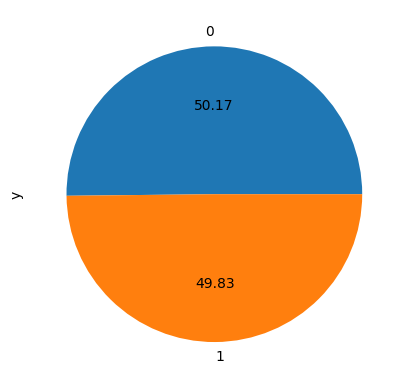

In [ ]:
# use ADASYN to oversample the minority class
ada = ADASYN(random_state=42)
X_ores, y_ores = ada.fit_resample(X, y)
ax= y_ores.value_counts().plot.pie(autopct='%.2f')

In [ ]:
print(X_ores.shape)
print(len(y_ores))

(72846, 26)
72846


In [ ]:
df_over = pd.concat([X_ores, y_ores], axis=1)

In [ ]:
df_over.isnull().sum().sort_values(ascending=False)

age                          3255
education                    2271
has_personal_loan            2101
has_house_loan               1778
credit_in_default_unknown    1486
job_Working                   755
p_mark_camp_nonexistent       706
pdays                         422
marital_married               388
job_Unemployed                372
contact_telephone             351
contact_cellular              351
house_loan_unknown            297
personal_loan_unknown         297
marital_single                279
marital_divorced              254
p_mark_camp_outcome           253
job_Unknown                   232
job_Student                   179
job_Retired                   144
marital_unknown                83
euribor3m                       0
campaign                        0
credit_in_default               0
previous                        0
emp.var.rate                    0
y                               0
dtype: int64

In [ ]:
df_over.isnull().sum().sum()

16254

In [ ]:
df_over.dropna(axis=0, inplace=True)

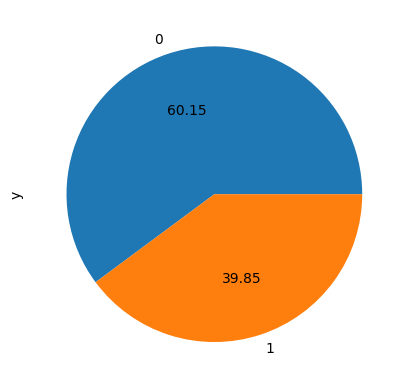

In [ ]:
X_ores = df_over.drop(['y'], axis=1)
y_ores = df_over['y']
ax= y_ores.value_counts().plot.pie(autopct='%.2f')

In [ ]:
X_train, X_test,  y_train, y_test = train_test_split(X_ores,y_ores, test_size=0.2, shuffle=True, stratify=y_ores, random_state=42)
print(X_train.shape)
print(X_test.shape)

# model = GradientBoostingClassifier(random_state=42, max_depth=6, validation_fraction=0.2,n_iter_no_change=10)
start = datetime.datetime.now()
model.fit(X_train, y_train)
end = datetime.datetime.now()
baseline_pred = model.predict(X_test)

pred_duration = (end - start).total_seconds()
accuracy = round(accuracy_score(y_test, baseline_pred),3)
f1 = round(f1_score(y_test, baseline_pred),3)
print(f'training duration: {pred_duration}\n accuracy: {accuracy} \n f1_score:{f1}')
print(classification_report(y_test, baseline_pred))

result_dict.update( {'Bassline_oversampled(26)':{'train_duration':pred_duration,'acc':accuracy,'f1':f1}})

(48608, 26)
(12153, 26)
training duration: 14.568425
 accuracy: 0.905 
 f1_score:0.875
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      7310
           1       0.92      0.84      0.88      4843

    accuracy                           0.90     12153
   macro avg       0.91      0.89      0.90     12153
weighted avg       0.91      0.90      0.90     12153



The result from the over sampling is better. The oversampled dataset will be used going forward.

In [ ]:
X = X_ores.copy()
y = y_ores.copy()

In [ ]:
X.shape

(60761, 26)

In [ ]:
f1_score_list =[]
accuracy_list = []
for k in tqdm(range(1, X.shape[1])):
  selector  = SelectKBest(mutual_info_classif, k=k )
  selector.fit(X_train,y_train)

  sel_X_train = selector.transform(X_train)
  sel_X_test = selector.transform(X_test)

  model.fit(sel_X_train,y_train)
  kbest_preds = model.predict(sel_X_test)

  accuracy_kbest = round(accuracy_score(y_test, kbest_preds),3)
  f1_kbest = round(f1_score(y_test, kbest_preds),3)

  accuracy_list.append(accuracy_kbest)
  f1_score_list.append(f1_kbest)

100%|██████████| 25/25 [06:33<00:00, 15.74s/it]


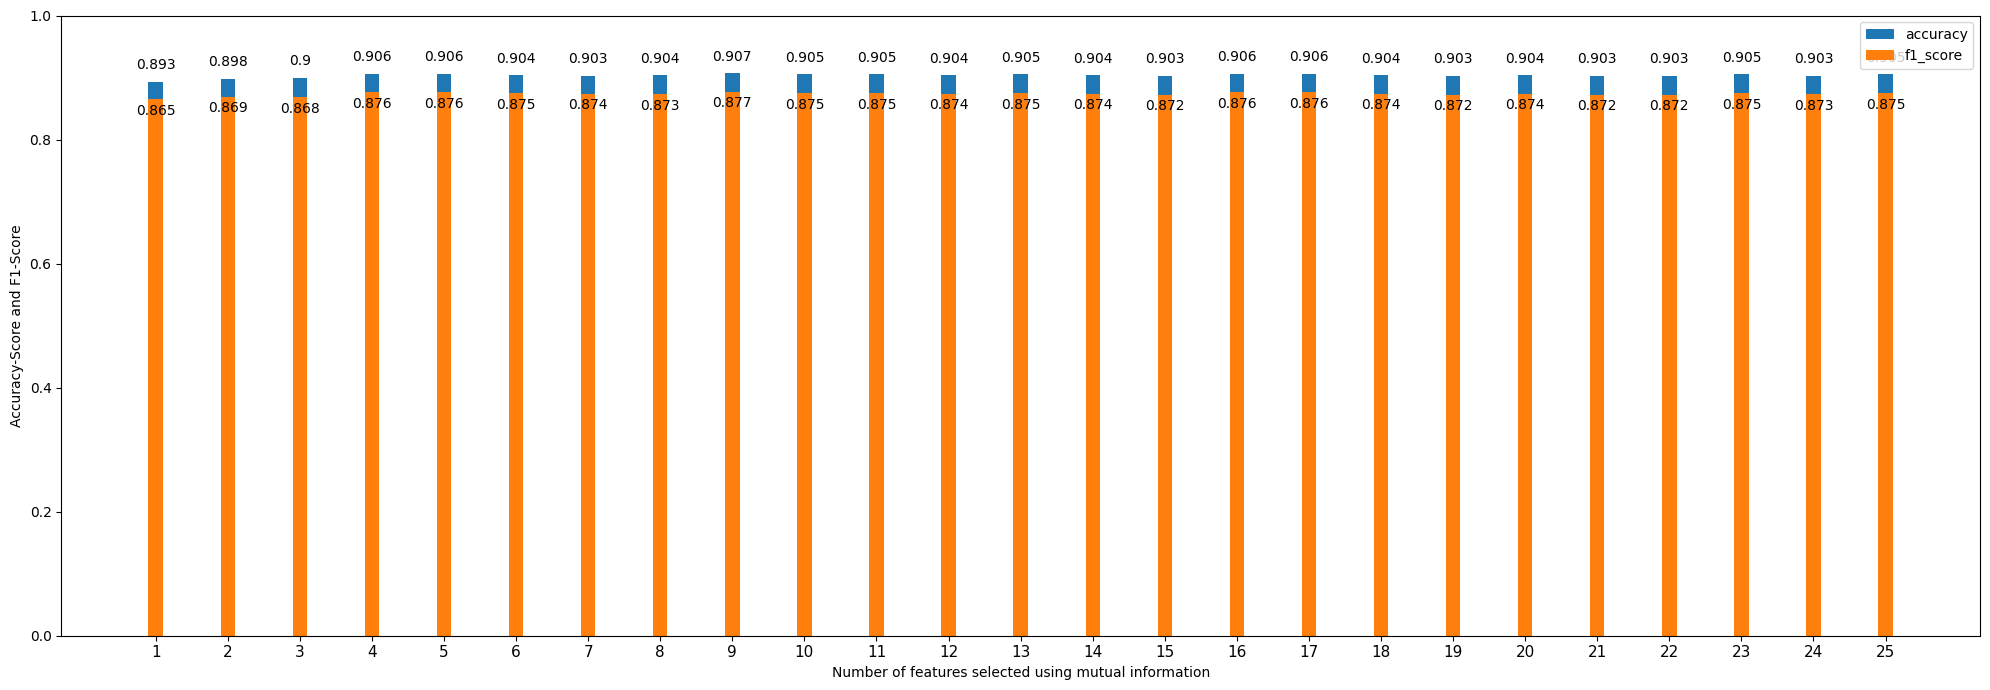

In [ ]:
fig,ax =plt.subplots(figsize=(20, 7))
n = X_train.shape[1]
x = np.arange(1,n)

ax.bar(x,accuracy_list,width=0.2)
ax.bar(x,f1_score_list,width=0.2)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('Accuracy-Score and F1-Score')
ax.set_ylim(0,1.0)
ax.set_xticks(np.arange(1,n))
ax.set_xticklabels(np.arange(1,n), fontsize=11)
plt.legend(['accuracy', 'f1_score'])

for i, v in enumerate(accuracy_list):
  plt.text(x=i+1, y=v+0.02, s=str(v), ha='center')


for i, v in enumerate(f1_score_list):
  plt.text(x=i+1, y=v-0.025, s=str(v), ha='center')
plt.tight_layout()

In [ ]:
selector = SelectKBest(mutual_info_classif, k=9)
selector.fit(X_train,y_train)

selected_feature_mask = selector.get_support()
selected_features_KBest = X_train.columns[selected_feature_mask]
selected_features_KBest

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'euribor3m',
       'credit_in_default_unknown', 'contact_cellular', 'contact_telephone'],
      dtype='object')

In [ ]:
dict_ ={'kbest_tresh(8)':{'train_duration':'na','acc':accuracy_list[8],'f1':f1_score_list[8]}}
result_dict.update(dict_)

In [ ]:
#Recursive feature elimination

In [ ]:
from sklearn.feature_selection import RFE

rfe_f1_score_list =[]
rfe_accuracy_list = []
for k in tqdm(range(1, X.shape[1])):
  RFE_selector  = RFE(estimator=model, n_features_to_select=k, step = 5)
  RFE_selector.fit(X_train,y_train)

  sel_X_train = RFE_selector.transform(X_train)
  sel_X_test = RFE_selector.transform(X_test)

  model.fit(sel_X_train,y_train)
  RFE_preds = model.predict(sel_X_test)

  accuracy_RFE = round(accuracy_score(y_test, RFE_preds),3)
  f1_RFE = round(f1_score(y_test, RFE_preds),3)

  rfe_accuracy_list.append(accuracy_RFE)
  rfe_f1_score_list.append(f1_RFE)

100%|██████████| 25/25 [17:55<00:00, 43.04s/it]


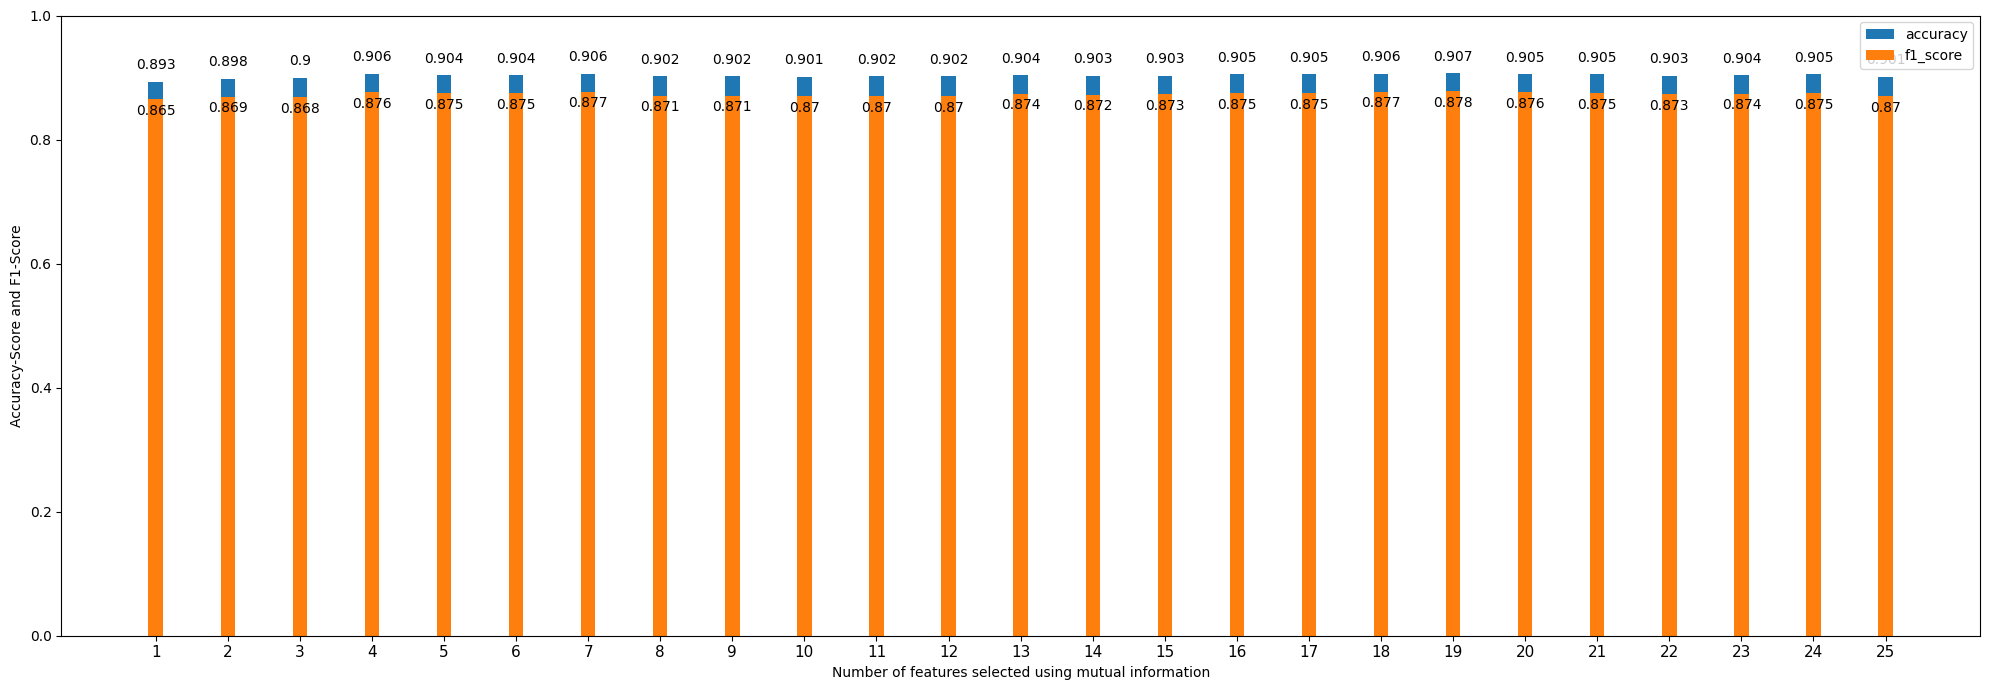

In [ ]:
fig,ax =plt.subplots(figsize=(20, 7))
n = X_train.shape[1]
x = np.arange(1,n)

ax.bar(x,rfe_accuracy_list,width=0.2)
ax.bar(x,rfe_f1_score_list,width=0.2)
ax.set_xlabel('Number of features selected using mutual information')
ax.set_ylabel('Accuracy-Score and F1-Score')
ax.set_ylim(0,1.0)
ax.set_xticks(np.arange(1,n))
ax.set_xticklabels(np.arange(1,n), fontsize=11)
plt.legend(['accuracy', 'f1_score'])

for i, v in enumerate(rfe_accuracy_list):
  plt.text(x=i+1, y=v+0.02, s=str(v), ha='center')


for i, v in enumerate(rfe_f1_score_list):
  plt.text(x=i+1, y=v-0.025, s=str(v), ha='center')
plt.tight_layout()

In [ ]:
RFE_selector  = RFE(estimator=model, n_features_to_select=19, step = 5)
RFE_selector.fit(X_train,y_train)
selected_feature_mask = RFE_selector.get_support()
RFE_selected_features = X_train.columns[selected_feature_mask]
RFE_selected_features

Index(['age', 'education', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'euribor3m', 'credit_in_default_unknown', 'has_house_loan',
       'has_personal_loan', 'p_mark_camp_nonexistent', 'p_mark_camp_outcome',
       'job_Unemployed', 'job_Working', 'marital_divorced', 'marital_married',
       'marital_single', 'contact_cellular', 'contact_telephone'],
      dtype='object')

In [ ]:
dict_ ={'rfe(19)':{'train_duration':'na','acc':rfe_accuracy_list[18],'f1':rfe_f1_score_list[18]}}
result_dict.update(dict_)

In [ ]:
result_dict


{'Baseline(28)': {'train_duration': 3.438942, 'acc': 0.897, 'f1': 0.364},
 'fe_Varance_tresh(26)': {'train_duration': 5.339251,
  'acc': 0.903,
  'f1': 0.381},
 'Bassline_oversampled(26)': {'train_duration': 14.568425,
  'acc': 0.905,
  'f1': 0.875},
 'kbest_tresh(8)': {'train_duration': 'na', 'acc': 0.907, 'f1': 0.877},
 'rfe(19)': {'train_duration': 'na', 'acc': 0.907, 'f1': 0.878}}

In [ ]:
all_selected_features = set(selected_features_KBest.append(RFE_selected_features))


In [ ]:
all_selected_features = list(all_selected_features)

In [ ]:
len(all_selected_features)

19

In [ ]:
X_train, X_test,  y_train, y_test = train_test_split(X[all_selected_features],y, test_size=0.2, shuffle=True,stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)

start = datetime.datetime.now()
model.fit(X_train, y_train)
end = datetime.datetime.now()
baseline_pred = model.predict(X_test)

pred_duration_var = (end - start).total_seconds()
accuracy_var = round(accuracy_score(y_test, baseline_pred),3)
f1_var = round(f1_score(y_test, baseline_pred),3)
print(f'training duration: {pred_duration_var}\n accuracy: {accuracy_var} \n f1_score:{f1_var}')
print(classification_report(y_test, baseline_pred))

dict_ ={'all_selected_feature(19)':{'train_duration':pred_duration_var,'acc':accuracy_var,'f1':f1_var}}
result_dict.update(dict_)

(48608, 19)
(12153, 19)
training duration: 9.588158
 accuracy: 0.907 
 f1_score:0.879
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      7310
           1       0.92      0.84      0.88      4843

    accuracy                           0.91     12153
   macro avg       0.91      0.90      0.90     12153
weighted avg       0.91      0.91      0.91     12153



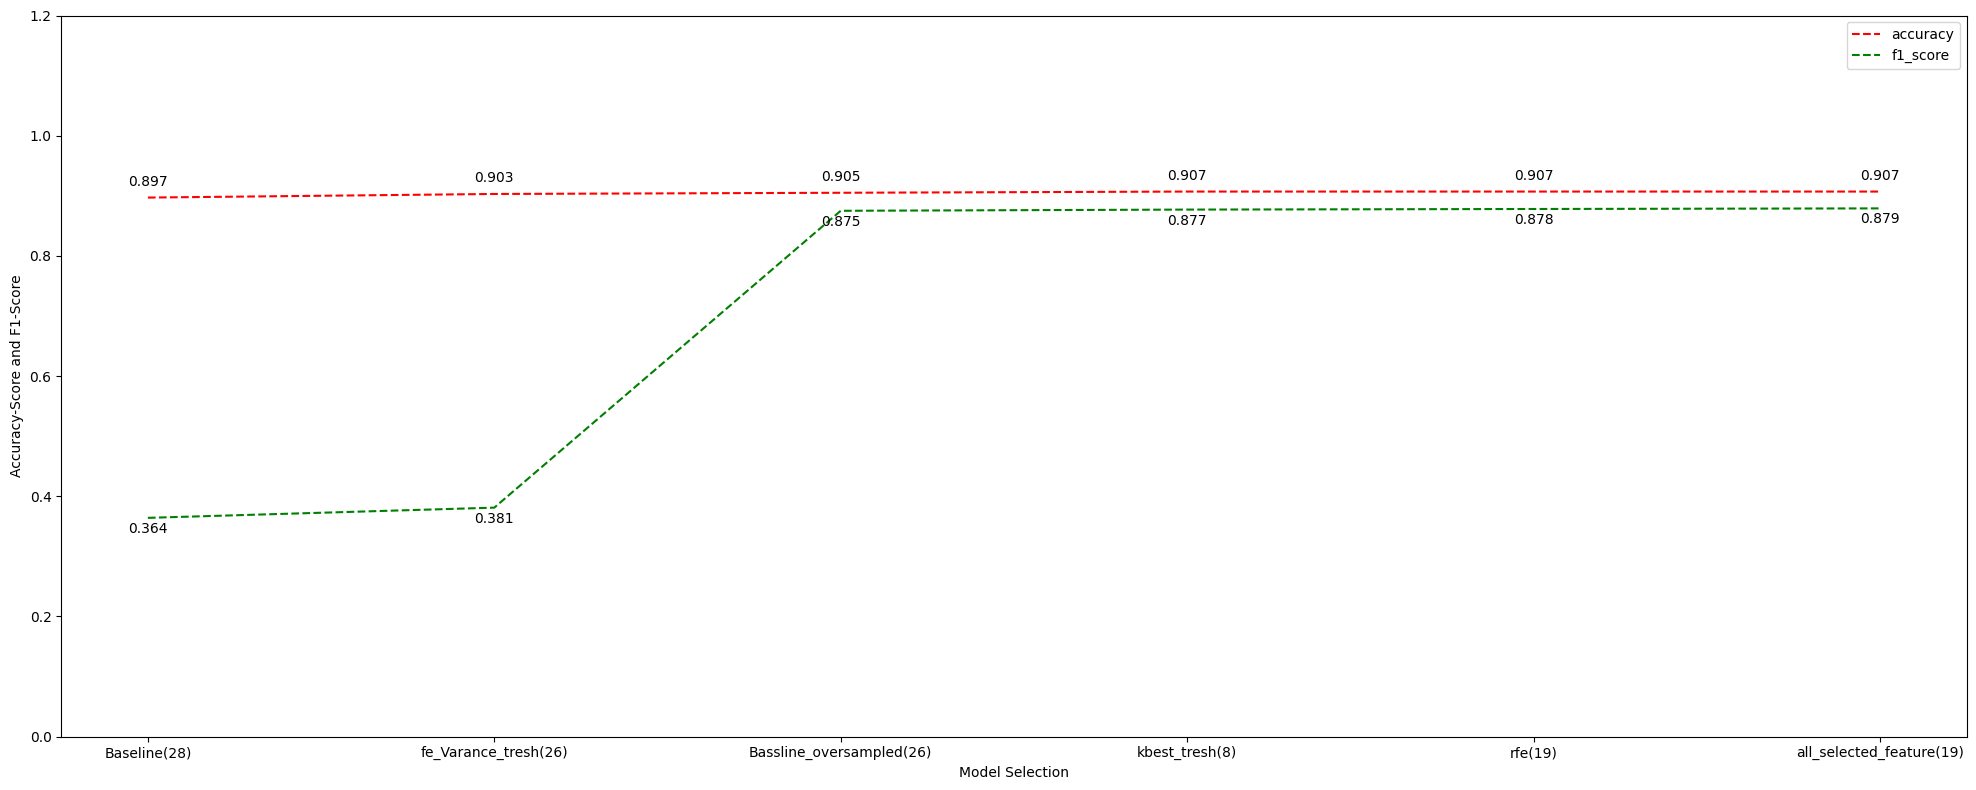

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

x =  [ i for i in result_dict.keys()]
value_acc = [result_dict[i]['acc'] for i in result_dict.keys()  ]
value_f1 = [result_dict[i]['f1'] for i in result_dict.keys()  ]

ax.plot(x,value_acc,'r--')
ax.plot(x,value_f1,'g--')
ax.set_xlabel('Model Selection')
ax.set_ylabel('Accuracy-Score and F1-Score')
ax.set_ylim(0,1.2)

plt.legend(['accuracy', 'f1_score'])

for i, v in enumerate(value_acc):
  plt.text(x=i, y=v+0.02, s=str(v), ha='center')


for i, v in enumerate(value_f1):
  plt.text(x=i, y=v-0.025, s=str(v), ha='center')
plt.tight_layout()



## Modeling

The goal of this step is to select the best machine learning algorithms for the model. To achieve this, a part of the dataset was trained on selected features were used to train on six machine learning algorithms using cross validation technique. The models were then compared based on Accuracy, F1_score, precision, and recall. The top two models were then selected for further hyper parameter tuning. Six models used in cross validation were:
- Random Forest classifier
- 	Decision Tree Classifier
- AdaBoost Classifier
- XGB Classifier
- Gradient Boost Classifier
- Logistic Regression


In [ ]:
X_copy4 = X.copy()

In [ ]:
X.shape

(60761, 26)

In [ ]:
X_train, X_test,  y_train, y_test = train_test_split(X[selected_features_KBest],y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
print(X_train.shape)
print(X_test.shape)

(48608, 9)
(12153, 9)


In [ ]:
X_train.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'euribor3m',
       'credit_in_default_unknown', 'contact_cellular', 'contact_telephone'],
      dtype='object')

In [ ]:
cv = KFold(n_splits=5, random_state=42,shuffle=True)
clf_RF = RandomForestClassifier( n_estimators= 100,  warm_start=True, max_depth=6, random_state=42)
clf_DT = DecisionTreeClassifier(max_depth=6, random_state=42)
clf_ADB = AdaBoostClassifier( n_estimators= 100, random_state=42)
clf_XGB = XGBClassifier(enable_categorical=True)
clf_GB = GradientBoostingClassifier(random_state=42, max_depth=6, validation_fraction=0.2,n_iter_no_change=10, n_estimators= 200, warm_start=False)
clf_LR = LogisticRegression(random_state=42)

models = [clf_RF,clf_DT,clf_ADB,clf_XGB,clf_GB,clf_LR]
for clf in models:
    scores = cross_val_score(clf, X_train, y_train,  scoring='accuracy', cv=cv, n_jobs=-1)
    f1_scores = cross_val_score(clf, X_train, y_train,  scoring='f1', cv=cv, n_jobs=-1)
    print('r2_%s: %.3f (%.3f)' % ( type(clf).__name__ ,np.mean(scores), np.mean(f1_scores)))
    print(f" \taccuracy: {scores} \n\t f1_score: {f1_scores}")

r2_RandomForestClassifier: 0.812 (0.742)
 	accuracy: [0.80950422 0.80693273 0.8169101  0.81596544 0.81010184] 
	 f1_score: [0.73206019 0.73868857 0.75529282 0.7477795  0.73530255]
r2_DecisionTreeClassifier: 0.811 (0.732)
 	accuracy: [0.81001851 0.81711582 0.80734417 0.80855879 0.81257072] 
	 f1_score: [0.7251079  0.7397541  0.7348903  0.72547573 0.73354782]
r2_AdaBoostClassifier: 0.837 (0.773)
 	accuracy: [0.83275046 0.84036207 0.83285332 0.84332888 0.83725954] 
	 f1_score: [0.75996457 0.77585211 0.77477477 0.78424706 0.77204611]
r2_XGBClassifier: 0.892 (0.856)
 	accuracy: [0.88664884 0.893849   0.88654598 0.89723279 0.8944553 ] 
	 f1_score: [0.8454418  0.85654712 0.85267798 0.86439528 0.85891089]
r2_GradientBoostingClassifier: 0.913 (0.886)
 	accuracy: [0.91164369 0.91287801 0.91195227 0.91533793 0.91091451] 
	 f1_score: [0.88273038 0.88421053 0.88792878 0.89025203 0.88284632]
r2_LogisticRegression: 0.710 (0.625)
 	accuracy: [0.71322773 0.70613043 0.70942193 0.71237527 0.71042074] 
	 

In [ ]:
for clf in models:
    pre_scores = cross_val_score(clf, X_train, y_train,  scoring='precision', cv=cv, n_jobs=-1)
    recall_scores = cross_val_score(clf, X_train, y_train,  scoring='recall', cv=cv, n_jobs=-1)
    print('r2_%s: %.3f (%.3f)' % ( type(clf).__name__ ,np.mean(pre_scores), np.mean(recall_scores)))
    print(f" \t precision: {pre_scores}  \n\t recall: {recall_scores}")

r2_RandomForestClassifier: 0.819 (0.679)
 	 precision: [0.81850534 0.78607407 0.83217207 0.83396226 0.82205835]  
	 recall: [0.66213033 0.69669118 0.69141707 0.67774086 0.66511025]
r2_DecisionTreeClassifier: 0.843 (0.647)
 	 precision: [0.84057971 0.83564815 0.83958603 0.85799023 0.84076433]  
	 recall: [0.63752944 0.66360294 0.65341052 0.62841809 0.65058366]
r2_AdaBoostClassifier: 0.869 (0.697)
 	 precision: [0.87165594 0.86200257 0.86212215 0.87984743 0.86839546]  
	 recall: [0.67364564 0.70535714 0.70349862 0.70738564 0.69494163]
r2_XGBClassifier: 0.913 (0.805)
 	 precision: [0.9108492  0.90992321 0.90836653 0.92182976 0.91395961]  
	 recall: [0.78879874 0.80908613 0.80342311 0.81369793 0.81011673]
r2_GradientBoostingClassifier: 0.925 (0.850)
 	 precision: [0.92265982 0.92215569 0.92523874 0.93084216 0.92253322]  
	 recall: [0.84611358 0.84926471 0.8535112  0.85305392 0.8464332 ]
r2_LogisticRegression: 0.646 (0.605)
 	 precision: [0.64479955 0.62931738 0.65364026 0.65604918 0.644044

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
def evaluate_ensemble(model,X_test,y_test):
  pred = model.predict(X_test)

  accuracy = accuracy_score(y_true=y_test, y_pred= pred)
  f1 = f1_score(y_true=y_test, y_pred= pred)
  precision = precision_score (y_true=y_test, y_pred= pred)
  recall = recall_score(y_true=y_test, y_pred= pred)
  cm = confusion_matrix(y_true=y_test, y_pred=pred)

  cm_display = ConfusionMatrixDisplay(cm).plot()
  print(classification_report(y_test, pred))

  return {'f1':f1,'acc':accuracy,'precision':precision,'recall':recall}


In [ ]:

model_A = XGBClassifier(n_estimators= 200, max_depth=6, random_state=42, nthread=6, objective='binary:logistic',subsample=0.8, learning_rate=1,enable_categorical=True )
model_B = GradientBoostingClassifier(random_state=42, max_depth=6, validation_fraction=0.2,n_iter_no_change=10, n_estimators= 200, warm_start=True)

In [ ]:
start = datetime.datetime.now()
model_A = model_A.fit(X_train, y_train)
end = datetime.datetime.now()
xgb_train_duration = (end - start).total_seconds()

start = datetime.datetime.now()
model_B = model_B.fit(X_train, y_train)
end = datetime.datetime.now()
gbc_train_duration = (end - start).total_seconds()

model_outputs = {type(model_A).__name__:model_A, type(model_B).__name__:model_B}
trainin_duration = {type(model_A).__name__:xgb_train_duration, type(model_B).__name__:gbc_train_duration}

In [ ]:
trainin_duration

{'XGBClassifier': 2.701224, 'GradientBoostingClassifier': 13.279112}

In [ ]:
def evaluate_model_part(model,X_test,y_test):
  start = datetime.datetime.now()
  pred = model.predict(X_test)
  end = datetime.datetime.now()
  pred_duration = (end - start).total_seconds()

  acc = accuracy_score(y_true=y_test, y_pred= pred)
  f1 = f1_score(y_true=y_test, y_pred= pred)
  precision = precision_score (y_true=y_test, y_pred= pred)
  recall = recall_score(y_true=y_test, y_pred= pred)

  models_eval_output = {'acc':acc,'precision':precision,'recall':recall, 'f1':f1,'duration': pred_duration}
  return models_eval_output

In [ ]:
results ={}
for model_name in model_outputs.keys():
  models_part = model_outputs[model_name]
  model_eval_result = evaluate_model_part(model=models_part, X_test= X_test, y_test=y_test)
  results.update({model_name: model_eval_result })


In [ ]:
result_df = pd.DataFrame(results)

In [ ]:
result_df

,XGBClassifier,GradientBoostingClassifier
acc,0.891879,0.914836
precision,0.911785,0.924432
recall,0.806731,0.856287
f1,0.856047,0.889056
duration,0.094406,0.067489


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
def evaluate_model(model,X_test,y_test):
  pred = model.predict(X_test)

  accuracy = accuracy_score(y_true=y_test, y_pred= pred)
  f1 = f1_score(y_true=y_test, y_pred= pred)
  precision = precision_score (y_true=y_test, y_pred= pred)
  recall = recall_score(y_true=y_test, y_pred= pred)
  cm = confusion_matrix(y_true=y_test, y_pred=pred)

  cm_display = ConfusionMatrixDisplay(cm).plot()
  print(f"{type(model).__name__}\n{classification_report(y_test, pred)}")

  return {'f1':f1,'acc':accuracy,'precision':precision,'recall':recall}


XGBClassifier
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7310
           1       0.91      0.81      0.86      4843

    accuracy                           0.89     12153
   macro avg       0.90      0.88      0.88     12153
weighted avg       0.89      0.89      0.89     12153

GradientBoostingClassifier
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7310
           1       0.92      0.86      0.89      4843

    accuracy                           0.91     12153
   macro avg       0.92      0.90      0.91     12153
weighted avg       0.92      0.91      0.91     12153



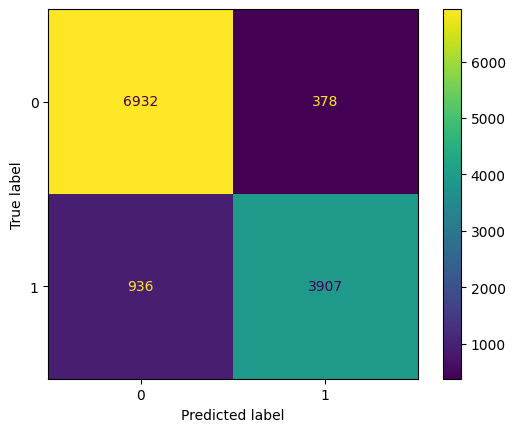

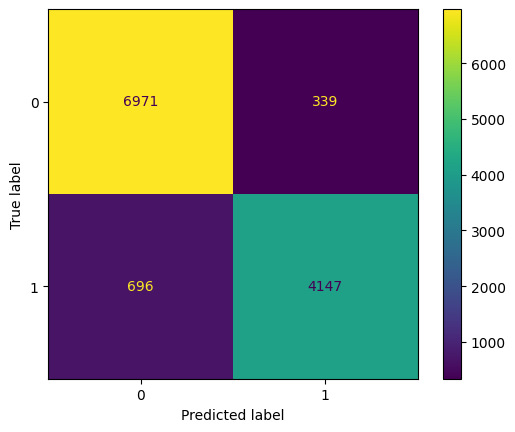

In [ ]:
ensemble_results ={}
for model_name in model_outputs.keys():
  models_part = model_outputs[model_name]
  ensemble_eval_result = evaluate_model(model=models_part, X_test= X_test, y_test=y_test)
  ensemble_results.update({model_name: ensemble_eval_result })

In [ ]:
ensemble_results

{'XGBClassifier': {'f1': 0.8560473269062226,
  'acc': 0.8918785485065416,
  'precision': 0.9117852975495916,
  'recall': 0.8067313648564939},
 'GradientBoostingClassifier': {'f1': 0.8890556329724516,
  'acc': 0.9148358430017279,
  'precision': 0.9244315648684797,
  'recall': 0.8562874251497006}}

In [ ]:



def plot_roc_pr(model, X_test, y_test):
    # Determine scores based on the availability of predict_proba or decision_function
    if hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
    elif hasattr(model, 'decision_function'):
        y_score = model.decision_function(X_test)
    else:
        raise ValueError("Model does not have a predict_proba or a decision_function method.")

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

    # Calculate Precision-Recall curve
    prec, recall, _ = precision_recall_curve(y_test, y_score)
    pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

    # Plot both ROC and Precision-Recall curves
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    roc_display.plot(ax=ax1)
    pr_display.plot(ax=ax2)

    ax1.set_title('ROC Curve')
    ax2.set_title('Precision-Recall Curve')
    plt.show()


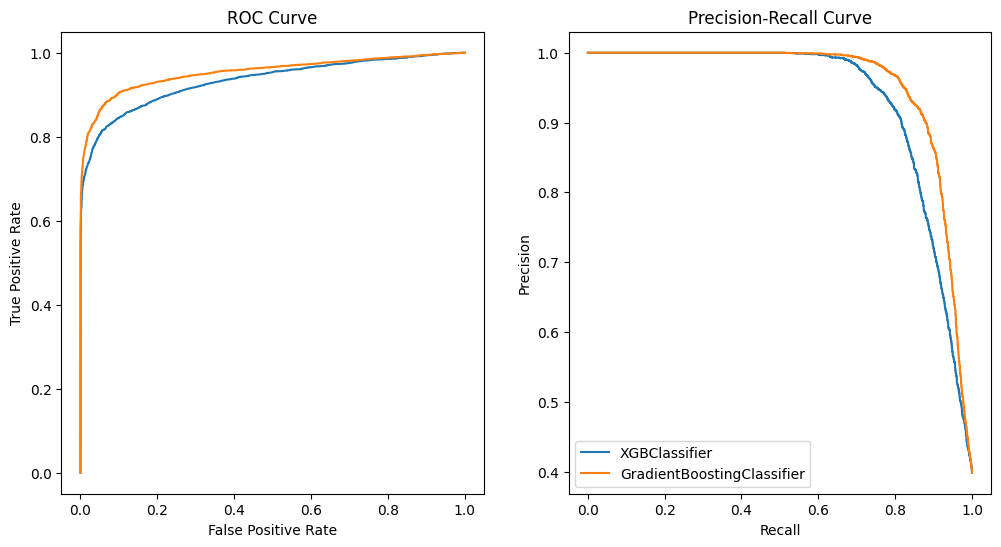

In [ ]:
yxgb_score = model_outputs['XGBClassifier'].predict_proba(X_test)[:, 1]
ygbc_score = model_outputs['GradientBoostingClassifier'].predict_proba(X_test)[:, 1]
# Calculate ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, yxgb_score)
xgb_roc_display = RocCurveDisplay(fpr=fpr_xgb, tpr=tpr_xgb)

fpr_gbc, tpr_gcb, _ = roc_curve(y_test, ygbc_score)
gbc_roc_display = RocCurveDisplay(fpr=fpr_gbc, tpr=tpr_gcb)

# Calculate Precision-Recall curve
prec_xgb, recall_xgb, _ = precision_recall_curve(y_test, yxgb_score)
xgb_pr_display = PrecisionRecallDisplay(precision=prec_xgb, recall=recall_xgb)

prec_gbc, recall_gbc, _ = precision_recall_curve(y_test, ygbc_score)
gbc_pr_display = PrecisionRecallDisplay(precision=prec_gbc, recall=recall_gbc)

# Plot both ROC and Precision-Recall curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
xgb_roc_display.plot(ax=ax1)
gbc_roc_display.plot(ax=ax1 )

xgb_pr_display.plot(ax=ax2)
gbc_pr_display.plot(ax=ax2)

ax1.set_title('ROC Curve')
ax2.set_title('Precision-Recall Curve')
plt.legend(['XGBClassifier', 'GradientBoostingClassifier'])
plt.show()

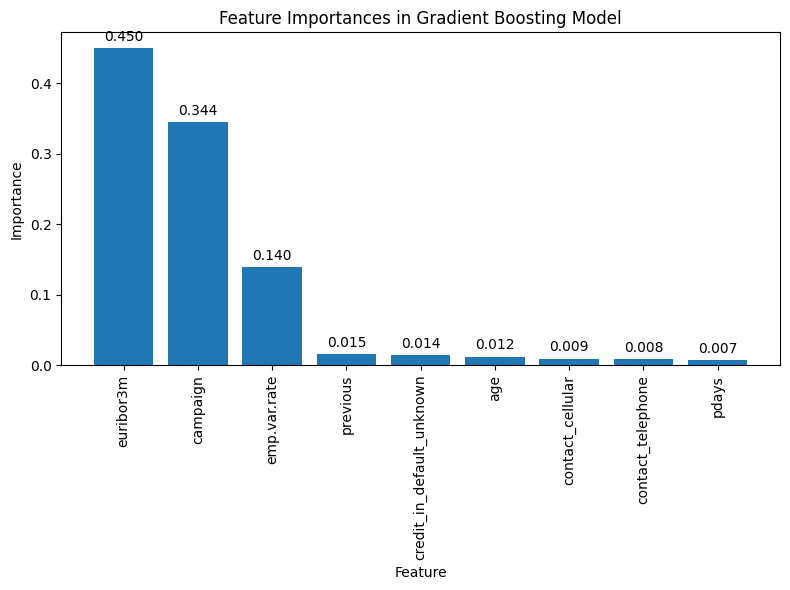

In [ ]:
model = model_outputs['GradientBoostingClassifier']

feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]  # Sort feature importances in descending order

# Plot
plt.figure(figsize=(8, 6))
plt.title("Feature Importances in Gradient Boosting Model")
bars = plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [selected_features_KBest[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


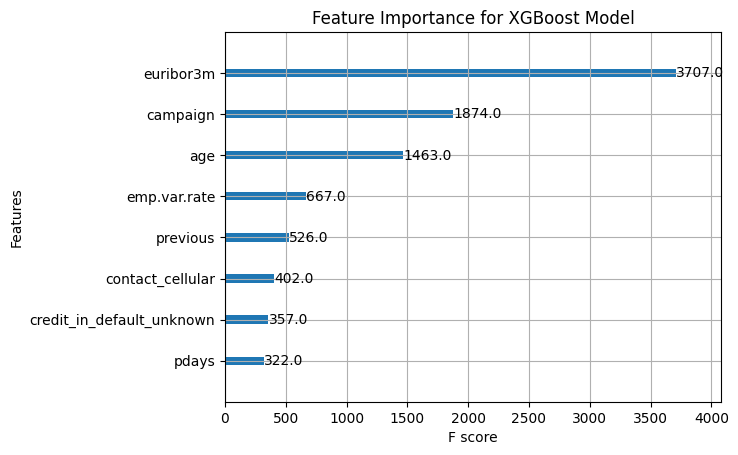

Feature 0: 0.054974205791950226
Feature 1: 0.258091002702713
Feature 2: 0.06864423304796219
Feature 3: 0.06339916586875916
Feature 4: 0.20439225435256958
Feature 5: 0.17288453876972198
Feature 6: 0.0798824355006218
Feature 7: 0.09773214161396027
Feature 8: 0.0


In [ ]:
xgb_model = model_outputs['XGBClassifier']
# Using the plot_importance function from XGBoost to visualize the feature importances
plot_importance(xgb_model)
plt.title('Feature Importance for XGBoost Model')
plt.show()

# Or to get the scores directly
feature_importances = xgb_model.feature_importances_
for i, feature_importance in enumerate(feature_importances):
    print(f"Feature {i}: {feature_importance}")


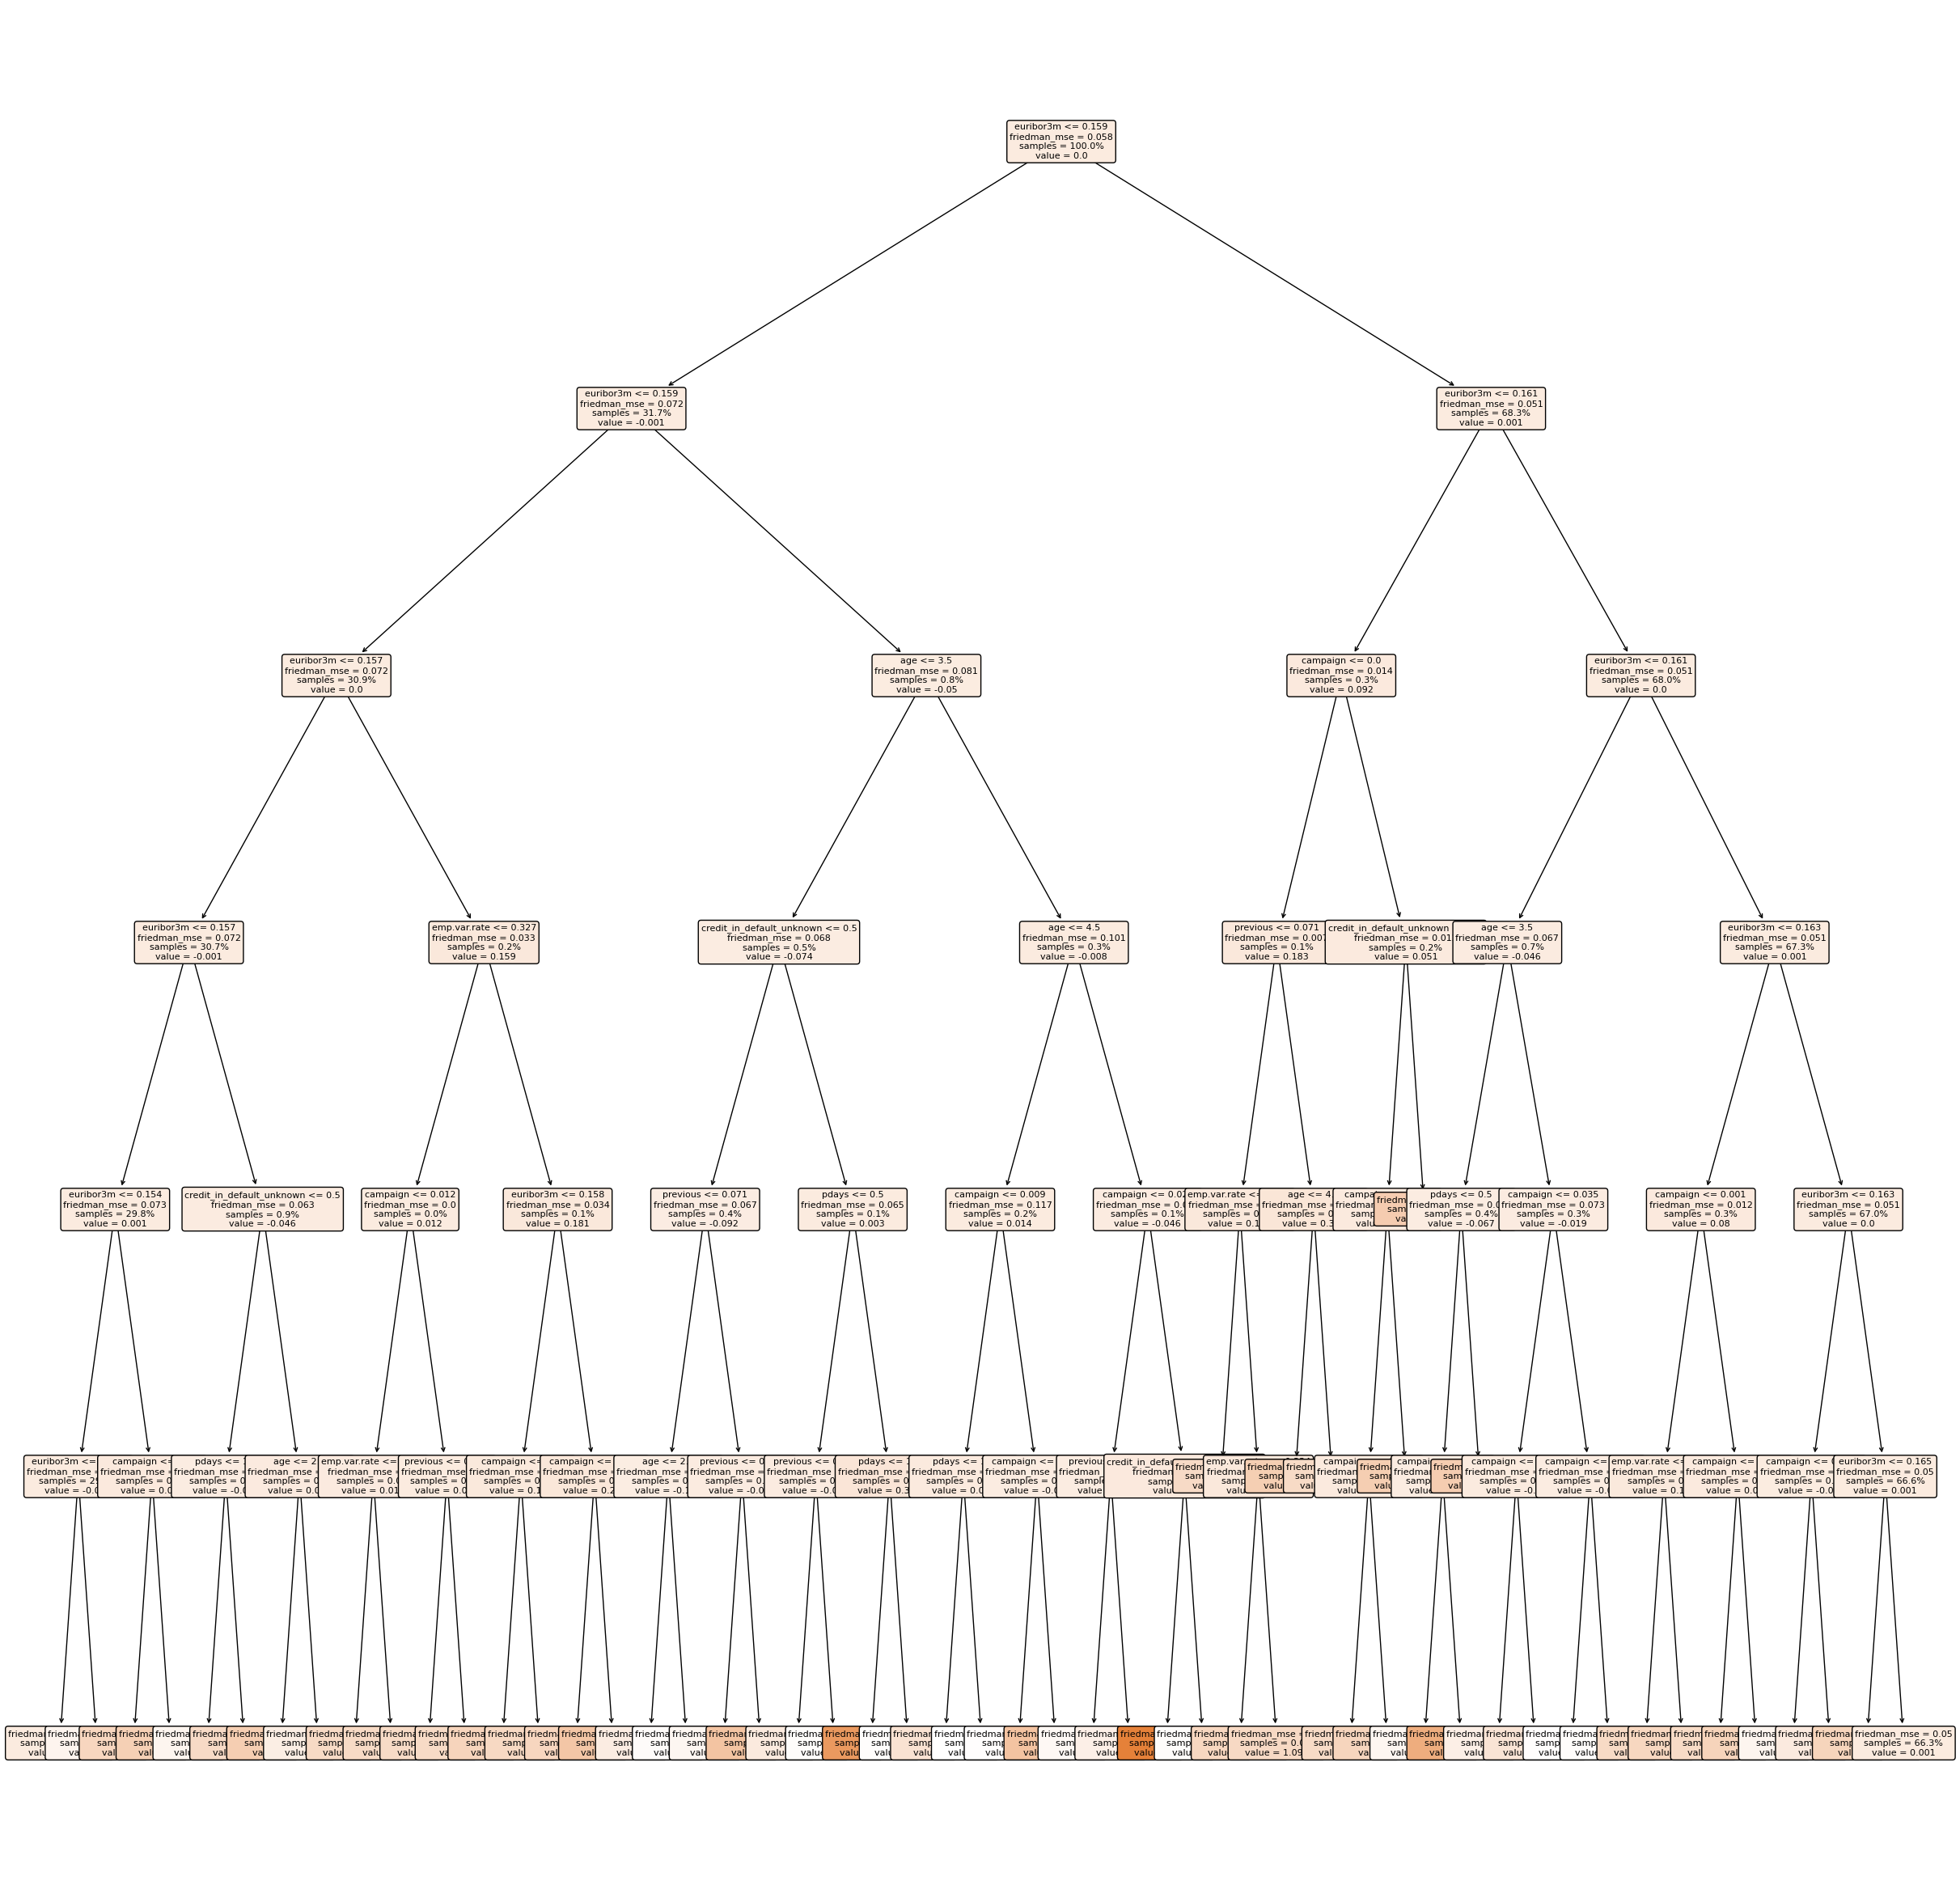

In [ ]:
model = model_outputs['GradientBoostingClassifier']
# Visualize one of the trees
sub_tree = model.estimators_[199, 0]  # First tree for the first class

plt.figure(figsize=(30, 30))
skplot_tree(sub_tree, filled=True, feature_names=selected_features_KBest, proportion=True, rounded=True, fontsize= 8)
plt.show()

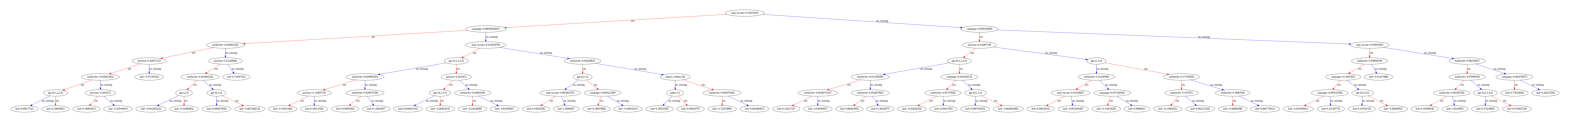

In [ ]:
model= model_outputs['XGBClassifier']


# Adjust figsize for a larger plot
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(model, label='all', num_trees=100, ax=ax )
plt.show()

In [ ]:


def tree_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}{name} <= {threshold}")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}{name} > {threshold}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}--> {tree_.value[node]}")

    recurse(0, 1)

# Assuming 'sub_tree' is your decision tree model and 'selected_features_KBest' are the feature names
tree_rules(sub_tree, selected_features_KBest)


  euribor3m <= 0.15869733691215515
    euribor3m <= 0.15869132429361343
      euribor3m <= 0.1572803035378456
        euribor3m <= 0.1571069061756134
          euribor3m <= 0.15393950045108795
            euribor3m <= 0.15392150729894638
              --> [[0.0086185]]
            euribor3m > 0.15392150729894638
              --> [[-0.60014437]]
          euribor3m > 0.15393950045108795
            campaign <= 0.00034606075496412814
              --> [[1.26594468]]
            campaign > 0.00034606075496412814
              --> [[1.67115053]]
        euribor3m > 0.1571069061756134
          credit_in_default_unknown <= 0.5
            pdays <= 1.5
              --> [[-0.60741059]]
            pdays > 1.5
              --> [[1.01369237]]
          credit_in_default_unknown > 0.5
            age <= 2.5
              --> [[1.78045896]]
            age > 2.5
              --> [[-0.17642013]]
      euribor3m > 0.1572803035378456
        emp.var.rate <= 0.3266112357378006
          campaign 

## Conclusion

This project successfully applied machine learning techniques to predict bank clients' responses to direct marketing mobile campaigns. By leveraging a comprehensive dataset, incorporating feature engineering, and implementing a variety of machine learning models, the study identified the Gradient Boost Classifier as the most effective model based on its superior performance in accuracy, precision, and F1 score.